### Packages

In [240]:
import numpy as np
import scipy.stats as stats

### Cournot

Dynamic Demand:
- $p_t = u_t - v \sum_i q_{it}$ 
- $u_t = \rho u_{t-1} + e_t, e_t \sim N(0,\sigma)$

Walrasian 
- $\pi_w = \max_{q_i}{(p - w) q_i}$ 
- $w = u - v Q$
- $Q_w = \frac{u-w}{v}$
- $P_w = w$
- $q_w \in [0,Q_w], \pi_w = 0, \Pi_w = 0$

Nash
- $\pi_c = \max_{q_i}{(p(Q) - w) q_i}$ 
- $p(Q) - w - v q_i = 0$
- $n p(Q) = n w + v Q = n u - n v Q$
- $Q_c = \frac{n(u-w)}{v(n+1)}$
- $P_c = u - v Q$
- $q_c = Q_c/n$

Monopoly
- $\pi_m = \max_{Q}{(p(Q) - w) Q}$ 
- $p(Q)=w+vQ=u-vQ$ 
- $Q_m =\frac{u-w}{2v}$ 
- $P_m =\frac{u-w}{2v}$


In [242]:
def price(Q,u,v):
    return u-v*Q

def profit(P,Q):
    return
           
class cournot:
    def __init__(self,u,v,w,n):
        self.u=u
        self.v=v
        self.w=w
        self.n=n
        self.Qw=(u-w)/v
        self.Qc=n*(u-w)/v/(n+1)
        self.Qm=(u-w)/2*v
        self.Pw = price(self.Qw,u,v)
        self.Pc = price(self.Qc,u,v)
        self.Pm = price(self.Qm,u,v)
        self.Πw = 0
        self.Πc = (self.Pc-w)*self.Qc
        self.Πm = (self.Pm-w)*self.Qm
        self.qw = self.Qw/n
        self.qc = self.Qc/n
        self.qm = self.Qm/n
        self.πw = 0
        self.πw = self.Πc/n
        self.πw = self.Πm/n
    
    def price(self,q,q_):
        return self.u-v*(q+q_)
    
    def profit(self,q,q_):
        return (self.price(q,q_)-w)*q
        
game1 = cournot(40,1,4,2)

In [243]:
game1.Qc, game1.qc, game1.Pc, game1.w, game1.Πc, game1.profit(12,12)

(24.0, 12.0, 16.0, 4, 288.0, 144)

In [244]:
game1.Qm, game1.qm, game1.Pm, game1.w, game1.Πm, game1.profit(9,9)

(18.0, 9.0, 22.0, 4, 324.0, 162)

### Shocks

In [245]:
# Input: ρ, σ, K
# Output: KxK Transition Matrix
ρ, σ, K = 0.9, 1, 10
σy = σ/np.sqrt(1-ρ**2)

def tauchen(ρ, σ, K, m=3):
    Z = np.linspace(-m * σ/np.sqrt(1-ρ**2), m * σ/np.sqrt(1-ρ**2), K) # Shock Space
    F = lambda x: stats.norm.cdf(x, 0, σ) # CDF Function for Standard Normal
    α = Z[2] - Z[1] # Step Size
    P = np.zeros((K,K)) # Placeholder Transition Matrix
    # P[i,j] is probability of process going from Zi to Zj 
    for i in range(K):
        for j in range(K):
            if j == 1:
                P[i, j] = F(Z[j]+α/2-ρ*Z[i])
            elif j == K:
                P[i, j] = 1 - F(Z[j]-α/2-ρ*Z[i])
            else:
                P[i, j] = F(Z[j]+α/2-ρ*Z[i]) - F(Z[j]-α/2-ρ*Z[i])
        P[i, :] = P[i, :]/sum(P[i, :])
    return Z, α, F, P
        
def whichidx(value, array):
    return np.argmin(np.abs(array-value))

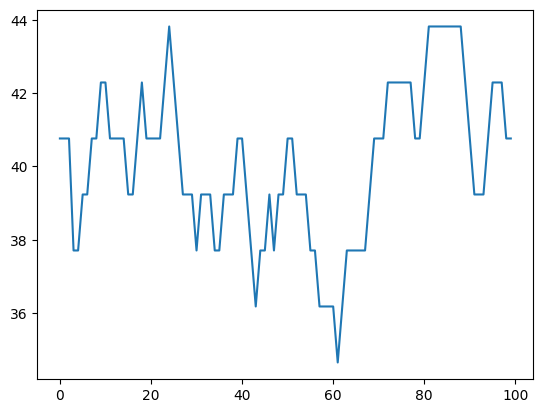

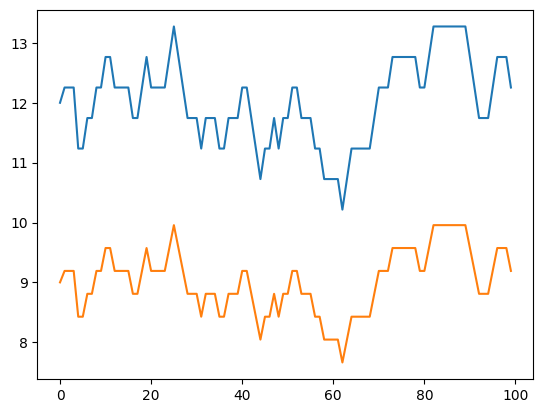

In [246]:
import numpy as np
rho = 0.9
sigma = 1
u = 40
uidx = 5
e = np.random.normal(1)*sigma
Z, α, F, P = tauchen(rho, sigma, K, m=3)
u_history=[]
pc_history=[]
pm_history=[]

for t in range(100):
    # find competition level profit 
    pc_history.append(cournot(u,v,w,n).qc)
    pm_history.append(cournot(u,v,w,n).qm)
  
    # generate next shock
    uidx = whichidx(np.random.choice(Z,p=P[uidx]), Z)
    u = 40 + Z[uidx]
    u_history.append(u)
    
plt.plot(u_history)
plt.show()

plt.plot(pc_history)
plt.plot(pm_history)
plt.show()

### Q-Learning

In [258]:
import random
import numpy as np

# initialize Boltzmann Q-learning parameters
alpha = 0.001
initial_temperature = 1.0
temperature_decay = 0.99999
min_temperature = 0.001
temperature = initial_temperature
initial_eps = 1.0
eps_decay = 0.99999
min_eps = 0.001
eps = initial_eps

# parameters of model
gamma = 0.9
u = 40
v = 1
w = 4
n = 2
sigma = 1
rho = 0.9

# initial shocks
u = 40
uidx = 5
e = np.random.normal(1)*sigma

# define the Boltzmann action selection function
def boltzmann_action_selection(Q, state, temperature):
    # compute the modified probabilities of each action using the Boltzmann distribution
    max_Q = np.max(Q[state])
    logits = (Q[state] - max_Q) / temperature
    exp_logits = np.exp(logits)
    probs = exp_logits / np.sum(exp_logits)
    # select an action using the computed probabilities
    action = np.random.choice(range(len(probs)), p=probs)
    return action

# initialize the Q-table
game = game1
num_states1 = 10
num_states2 = 10
num_actions = 10
Q1 = np.ones((num_states1*num_states2, num_actions))
Q2 = np.ones((num_states1*num_states2, num_actions))

# histories
q1_history = []
q2_history = []
u_history = []
qc_history=[]
qm_history=[]
pc_history=[]
pm_history=[]

action2quantity = np.linspace(game.qc*0.8,game.qm*1.2,num_actions)

In [259]:
# run Boltzmann Q-learning for a fixed number of episodes
# initialize the state
state1 = 0
state2 = 0
num_episodes = 100000
for episode in range(num_episodes):
    
   # generate shock
    uidx = whichidx(np.random.choice(Z,p=P[uidx]), Z)
    u = 40 + Z[uidx]
    
    if np.random.uniform()>eps:
        # select an action using Boltzmann action selection
        action1 = boltzmann_action_selection(Q1, state1,temperature)
    else:
        action1 = np.random.choice(range(num_actions))

    if np.random.uniform()>eps:
        # select an action using Boltzmann action selection
        action2 = boltzmann_action_selection(Q2, state2,temperature)
    else:
        action2 = np.random.choice(range(num_actions))

    quantity1 = action2quantity[action1]
    quantity2 = action2quantity[action2]

    # take the selected action and observe the next state and reward
    next_state1 = 10*action2+uidx
    next_state2 = 10*action1+uidx

    # rewards
    reward1 = cournot(u,v,w,n).profit(quantity1,quantity2)
    reward2 = cournot(u,v,w,n).profit(quantity2,quantity1)

    # update the Q-value for the selected action in the current state
    Q1[state1][action1] =  (1-alpha)*Q1[state1][action1] + alpha * (reward1 + gamma * np.max(Q1[next_state1]))
    Q2[state2][action2] =  (1-alpha)*Q2[state2][action2] + alpha * (reward2 + gamma * np.max(Q2[next_state2]))

    # move to the next state
    state1 = next_state1
    state2 = next_state2
    u_ = u

    # update temperature
    temperature = max(min_temperature, temperature * temperature_decay)
    eps = max(min_eps, eps * eps_decay)
    
    print(quantity1, quantity2, temperature, eps)
    
    u_history.append(u)
    q1_history.append(quantity1)
    q2_history.append(quantity2)
    qc_history.append(cournot(u,v,w,n).qc)
    qm_history.append(cournot(u,v,w,n).qm)
    pc_history.append(cournot(u,v,w,n).profit(quantity1,quantity2))
    pm_history.append(cournot(u,v,w,n).profit(quantity1,quantity2))
  

10.266666666666667 9.733333333333334 0.99999 0.99999
10.0 10.4 0.9999800001000001 0.9999800001000001
10.666666666666666 9.866666666666667 0.9999700002999992 0.9999700002999992
9.733333333333334 10.4 0.9999600005999962 0.9999600005999962
10.533333333333333 10.4 0.9999500009999903 0.9999500009999903
10.799999999999999 10.266666666666667 0.9999400014999804 0.9999400014999804
10.4 10.133333333333333 0.9999300020999654 0.9999300020999654
10.133333333333333 10.799999999999999 0.9999200027999444 0.9999200027999444
10.4 10.4 0.9999100035999164 0.9999100035999164
10.666666666666666 9.733333333333334 0.9999000044998805 0.9999000044998805
9.600000000000001 9.600000000000001 0.9998900054998355 0.9998900054998355
10.133333333333333 10.0 0.9998800065997806 0.9998800065997806
10.0 9.600000000000001 0.9998700077997147 0.9998700077997147
10.799999999999999 10.4 0.9998600090996367 0.9998600090996367
10.666666666666666 9.866666666666667 0.9998500104995457 0.9998500104995457
10.0 10.533333333333333 0.9998

9.866666666666667 9.733333333333334 0.983822207637333 0.983822207637333
9.733333333333334 9.866666666666667 0.9838123694152566 0.9838123694152566
9.600000000000001 10.4 0.9838025312915625 0.9838025312915625
10.266666666666667 9.866666666666667 0.9837926932662496 0.9837926932662496
9.866666666666667 10.799999999999999 0.983782855339317 0.983782855339317
10.666666666666666 10.0 0.9837730175107636 0.9837730175107636
10.133333333333333 10.266666666666667 0.9837631797805886 0.9837631797805886
10.666666666666666 10.533333333333333 0.9837533421487908 0.9837533421487908
10.0 10.266666666666667 0.9837435046153694 0.9837435046153694
10.266666666666667 10.666666666666666 0.9837336671803233 0.9837336671803233
10.4 10.0 0.9837238298436516 0.9837238298436516
10.533333333333333 10.533333333333333 0.9837139926053532 0.9837139926053532
10.4 10.133333333333333 0.9837041554654272 0.9837041554654272
10.533333333333333 10.0 0.9836943184238726 0.9836943184238726
10.799999999999999 9.866666666666667 0.983684

10.133333333333333 9.600000000000001 0.9724660252252667 0.9724660252252667
10.0 10.4 0.9724563005650145 0.9724563005650145
9.600000000000001 10.799999999999999 0.9724465760020089 0.9724465760020089
9.733333333333334 10.266666666666667 0.9724368515362489 0.9724368515362489
10.133333333333333 9.733333333333334 0.9724271271677336 0.9724271271677336
9.733333333333334 10.266666666666667 0.972417402896462 0.972417402896462
10.799999999999999 10.799999999999999 0.972407678722433 0.972407678722433
10.533333333333333 10.799999999999999 0.9723979546456458 0.9723979546456458
10.266666666666667 10.4 0.9723882306660994 0.9723882306660994
10.799999999999999 10.666666666666666 0.9723785067837928 0.9723785067837928
9.866666666666667 10.266666666666667 0.972368782998725 0.972368782998725
10.799999999999999 10.533333333333333 0.9723590593108951 0.9723590593108951
10.4 10.4 0.972349335720302 0.972349335720302
10.799999999999999 9.733333333333334 0.9723396122269449 0.9723396122269449
10.533333333333333 10

10.4 10.799999999999999 0.964225411690451 0.964225411690451
10.799999999999999 10.533333333333333 0.9642157694363341 0.9642157694363341
10.4 10.0 0.9642061272786399 0.9642061272786399
10.666666666666666 10.799999999999999 0.9641964852173671 0.9641964852173671
9.733333333333334 10.0 0.964186843252515 0.964186843252515
10.533333333333333 10.0 0.9641772013840826 0.9641772013840826
10.133333333333333 10.0 0.9641675596120688 0.9641675596120688
10.799999999999999 9.600000000000001 0.9641579179364728 0.9641579179364728
10.266666666666667 10.799999999999999 0.9641482763572934 0.9641482763572934
9.866666666666667 10.133333333333333 0.9641386348745299 0.9641386348745299
10.0 10.133333333333333 0.9641289934881812 0.9641289934881812
10.133333333333333 10.533333333333333 0.9641193521982463 0.9641193521982463
9.733333333333334 9.733333333333334 0.9641097110047243 0.9641097110047243
10.533333333333333 10.4 0.9641000699076143 0.9641000699076143
10.4 10.799999999999999 0.9640904289069153 0.964090428906

10.4 10.533333333333333 0.9567910778189235 0.9567910778189235
10.0 9.733333333333334 0.9567815099081454 0.9567815099081454
10.533333333333333 10.799999999999999 0.9567719420930463 0.9567719420930463
10.533333333333333 10.533333333333333 0.9567623743736254 0.9567623743736254
10.666666666666666 10.533333333333333 0.9567528067498817 0.9567528067498817
10.133333333333333 10.266666666666667 0.9567432392218143 0.9567432392218143
10.133333333333333 10.533333333333333 0.956733671789422 0.956733671789422
9.600000000000001 10.266666666666667 0.9567241044527042 0.9567241044527042
10.266666666666667 9.866666666666667 0.9567145372116597 0.9567145372116597
9.600000000000001 10.4 0.9567049700662876 0.9567049700662876
10.666666666666666 9.733333333333334 0.9566954030165871 0.9566954030165871
10.799999999999999 9.600000000000001 0.956685836062557 0.956685836062557
10.666666666666666 10.266666666666667 0.9566762692041964 0.9566762692041964
10.133333333333333 9.600000000000001 0.9566667024415043 0.956666

9.600000000000001 10.133333333333333 0.9491102984497214 0.9491102984497214
10.266666666666667 10.266666666666667 0.949100807346737 0.949100807346737
9.733333333333334 9.866666666666667 0.9490913163386635 0.9490913163386635
9.600000000000001 10.799999999999999 0.9490818254255001 0.9490818254255001
9.733333333333334 9.600000000000001 0.9490723346072459 0.9490723346072459
10.4 10.266666666666667 0.9490628438838999 0.9490628438838999
10.666666666666666 10.266666666666667 0.9490533532554611 0.9490533532554611
10.799999999999999 10.666666666666666 0.9490438627219286 0.9490438627219286
10.4 9.866666666666667 0.9490343722833015 0.9490343722833015
10.666666666666666 10.799999999999999 0.9490248819395787 0.9490248819395787
10.533333333333333 10.133333333333333 0.9490153916907593 0.9490153916907593
10.266666666666667 10.0 0.9490059015368425 0.9490059015368425
10.266666666666667 9.733333333333334 0.9489964114778272 0.9489964114778272
9.866666666666667 10.133333333333333 0.9489869215137124 0.948986

9.733333333333334 10.266666666666667 0.9417454158624559 0.9417454158624559
10.0 10.4 0.9417359984082972 0.9417359984082972
9.866666666666667 9.866666666666667 0.9417265810483132 0.9417265810483132
10.4 10.799999999999999 0.9417171637825028 0.9417171637825028
9.733333333333334 10.533333333333333 0.941707746610865 0.941707746610865
9.733333333333334 10.666666666666666 0.9416983295333989 0.9416983295333989
10.133333333333333 9.733333333333334 0.9416889125501037 0.9416889125501037
9.866666666666667 10.133333333333333 0.9416794956609782 0.9416794956609782
9.733333333333334 10.0 0.9416700788660216 0.9416700788660216
10.533333333333333 9.733333333333334 0.941660662165233 0.941660662165233
9.733333333333334 10.799999999999999 0.9416512455586115 0.9416512455586115
10.666666666666666 9.866666666666667 0.9416418290461559 0.9416418290461559
10.133333333333333 10.4 0.9416324126278655 0.9416324126278655
9.866666666666667 10.666666666666666 0.9416229963037392 0.9416229963037392
10.133333333333333 10.

9.866666666666667 10.4 0.9325053880585199 0.9325053880585199
10.799999999999999 10.266666666666667 0.9324960630046394 0.9324960630046394
9.600000000000001 10.4 0.9324867380440094 0.9324867380440094
10.4 10.533333333333333 0.932477413176629 0.932477413176629
10.666666666666666 10.133333333333333 0.9324680884024973 0.9324680884024973
9.733333333333334 9.733333333333334 0.9324587637216133 0.9324587637216133
9.866666666666667 10.4 0.9324494391339762 0.9324494391339762
10.799999999999999 10.0 0.9324401146395849 0.9324401146395849
10.4 10.266666666666667 0.9324307902384386 0.9324307902384386
9.866666666666667 10.666666666666666 0.9324214659305362 0.9324214659305362
9.600000000000001 10.4 0.9324121417158769 0.9324121417158769
9.866666666666667 10.4 0.9324028175944599 0.9324028175944599
9.600000000000001 10.799999999999999 0.932393493566284 0.932393493566284
10.799999999999999 10.4 0.9323841696313484 0.9323841696313484
10.799999999999999 10.4 0.9323748457896521 0.9323748457896521
9.73333333333

9.866666666666667 10.266666666666667 0.9243537878844441 0.9243537878844441
9.866666666666667 9.600000000000001 0.9243445443465653 0.9243445443465653
9.600000000000001 10.0 0.9243353009011219 0.9243353009011219
9.733333333333334 9.866666666666667 0.9243260575481129 0.9243260575481129
9.866666666666667 10.0 0.9243168142875375 0.9243168142875375
10.4 9.600000000000001 0.9243075711193947 0.9243075711193947
10.4 10.799999999999999 0.9242983280436835 0.9242983280436835
10.0 10.266666666666667 0.9242890850604031 0.9242890850604031
10.533333333333333 10.666666666666666 0.9242798421695525 0.9242798421695525
9.600000000000001 10.533333333333333 0.9242705993711309 0.9242705993711309
9.866666666666667 9.600000000000001 0.9242613566651372 0.9242613566651372
9.866666666666667 9.600000000000001 0.9242521140515706 0.9242521140515706
10.533333333333333 10.266666666666667 0.9242428715304302 0.9242428715304302
9.733333333333334 10.4 0.9242336291017149 0.9242336291017149
9.866666666666667 10.4 0.924224386

10.799999999999999 10.666666666666666 0.9163559145687602 0.9163559145687602
9.600000000000001 10.799999999999999 0.9163467510096146 0.9163467510096146
10.799999999999999 10.0 0.9163375875421046 0.9163375875421046
9.600000000000001 9.600000000000001 0.9163284241662292 0.9163284241662292
10.799999999999999 9.866666666666667 0.9163192608819876 0.9163192608819876
10.4 10.4 0.9163100976893788 0.9163100976893788
10.666666666666666 10.533333333333333 0.9163009345884019 0.9163009345884019
9.733333333333334 9.733333333333334 0.9162917715790561 0.9162917715790561
10.0 9.866666666666667 0.9162826086613403 0.9162826086613403
10.133333333333333 10.533333333333333 0.9162734458352537 0.9162734458352537
10.0 9.600000000000001 0.9162642831007954 0.9162642831007954
10.266666666666667 9.600000000000001 0.9162551204579644 0.9162551204579644
10.799999999999999 9.866666666666667 0.9162459579067599 0.9162459579067599
9.733333333333334 10.799999999999999 0.9162367954471808 0.9162367954471808
9.600000000000001

10.666666666666666 10.266666666666667 0.9087725116808362 0.9087725116808362
9.600000000000001 10.4 0.9087634239557194 0.9087634239557194
10.266666666666667 10.799999999999999 0.9087543363214798 0.9087543363214798
10.4 10.0 0.9087452487781167 0.9087452487781167
10.266666666666667 10.133333333333333 0.908736161325629 0.908736161325629
10.4 10.533333333333333 0.9087270739640158 0.9087270739640158
10.799999999999999 10.4 0.9087179866932762 0.9087179866932762
10.533333333333333 10.4 0.9087088995134093 0.9087088995134093
10.0 10.266666666666667 0.9086998124244142 0.9086998124244142
9.600000000000001 9.600000000000001 0.90869072542629 0.90869072542629
10.0 10.0 0.9086816385190358 0.9086816385190358
10.666666666666666 9.866666666666667 0.9086725517026507 0.9086725517026507
9.866666666666667 10.4 0.9086634649771337 0.9086634649771337
9.866666666666667 10.4 0.908654378342484 0.908654378342484
9.600000000000001 9.600000000000001 0.9086452917987006 0.9086452917987006
10.0 10.0 0.9086362053457826 0

10.799999999999999 10.133333333333333 0.9018108182760806 0.9018108182760806
10.4 10.266666666666667 0.9018018001678978 0.9018018001678978
10.799999999999999 10.133333333333333 0.9017927821498961 0.9017927821498961
10.0 9.733333333333334 0.9017837642220746 0.9017837642220746
9.866666666666667 9.866666666666667 0.9017747463844324 0.9017747463844324
10.266666666666667 9.733333333333334 0.9017657286369687 0.9017657286369687
10.666666666666666 10.133333333333333 0.9017567109796824 0.9017567109796824
10.666666666666666 10.799999999999999 0.9017476934125725 0.9017476934125725
9.733333333333334 10.4 0.9017386759356385 0.9017386759356385
9.600000000000001 9.733333333333334 0.9017296585488792 0.9017296585488792
9.866666666666667 9.733333333333334 0.9017206412522938 0.9017206412522938
9.733333333333334 10.4 0.9017116240458813 0.9017116240458813
10.266666666666667 9.733333333333334 0.9017026069296409 0.9017026069296409
10.0 9.733333333333334 0.9016935899035716 0.9016935899035716
10.666666666666666

10.533333333333333 10.266666666666667 0.8949740506603449 0.8949740506603449
10.799999999999999 10.0 0.8949651009198383 0.8949651009198383
9.733333333333334 10.533333333333333 0.8949561512688291 0.8949561512688291
10.266666666666667 10.133333333333333 0.8949472017073165 0.8949472017073165
10.799999999999999 10.133333333333333 0.8949382522352994 0.8949382522352994
10.133333333333333 10.133333333333333 0.8949293028527772 0.8949293028527772
10.533333333333333 10.266666666666667 0.8949203535597486 0.8949203535597486
9.733333333333334 10.133333333333333 0.8949114043562131 0.8949114043562131
10.533333333333333 10.4 0.8949024552421696 0.8949024552421696
9.600000000000001 10.4 0.8948935062176172 0.8948935062176172
10.666666666666666 10.4 0.8948845572825551 0.8948845572825551
10.0 9.733333333333334 0.8948756084369823 0.8948756084369823
10.533333333333333 10.133333333333333 0.894866659680898 0.894866659680898
9.600000000000001 10.4 0.8948577110143012 0.8948577110143012
9.600000000000001 10.533333

9.866666666666667 10.666666666666666 0.8897359157590999 0.8897359157590999
10.266666666666667 10.133333333333333 0.8897270183999424 0.8897270183999424
9.866666666666667 9.733333333333334 0.8897181211297585 0.8897181211297585
10.799999999999999 10.266666666666667 0.8897092239485472 0.8897092239485472
9.866666666666667 10.0 0.8897003268563078 0.8897003268563078
10.533333333333333 10.666666666666666 0.8896914298530393 0.8896914298530393
10.666666666666666 10.4 0.8896825329387408 0.8896825329387408
10.666666666666666 10.533333333333333 0.8896736361134114 0.8896736361134114
10.4 10.799999999999999 0.8896647393770504 0.8896647393770504
10.666666666666666 10.0 0.8896558427296567 0.8896558427296567
10.133333333333333 10.799999999999999 0.8896469461712294 0.8896469461712294
10.0 9.866666666666667 0.8896380497017677 0.8896380497017677
10.666666666666666 9.866666666666667 0.8896291533212708 0.8896291533212708
9.733333333333334 10.266666666666667 0.8896202570297376 0.8896202570297376
9.73333333333

10.266666666666667 10.266666666666667 0.8859891227542506 0.8859891227542506
10.266666666666667 10.533333333333333 0.8859802628630231 0.8859802628630231
10.266666666666667 10.533333333333333 0.8859714030603946 0.8859714030603946
9.600000000000001 9.866666666666667 0.885962543346364 0.885962543346364
10.4 10.0 0.8859536837209306 0.8859536837209306
10.0 10.666666666666666 0.8859448241840935 0.8859448241840935
10.133333333333333 9.866666666666667 0.8859359647358517 0.8859359647358517
10.133333333333333 9.733333333333334 0.8859271053762043 0.8859271053762043
9.733333333333334 10.666666666666666 0.8859182461051506 0.8859182461051506
10.666666666666666 10.533333333333333 0.8859093869226896 0.8859093869226896
9.733333333333334 10.0 0.8859005278288204 0.8859005278288204
10.133333333333333 10.666666666666666 0.8858916688235422 0.8858916688235422
9.733333333333334 10.266666666666667 0.885882809906854 0.885882809906854
10.533333333333333 10.4 0.885873951078755 0.885873951078755
9.866666666666667 1

10.4 10.0 0.8808211914837891 0.8808211914837891
10.266666666666667 9.866666666666667 0.8808123832718743 0.8808123832718743
10.133333333333333 9.600000000000001 0.8808035751480416 0.8808035751480416
10.0 10.4 0.8807947671122902 0.8807947671122902
10.266666666666667 10.0 0.8807859591646191 0.8807859591646191
10.266666666666667 10.266666666666667 0.8807771513050275 0.8807771513050275
10.133333333333333 10.4 0.8807683435335145 0.8807683435335145
10.266666666666667 9.600000000000001 0.8807595358500793 0.8807595358500793
9.866666666666667 10.133333333333333 0.8807507282547208 0.8807507282547208
10.266666666666667 10.4 0.8807419207474383 0.8807419207474383
10.4 9.733333333333334 0.8807331133282309 0.8807331133282309
10.666666666666666 9.600000000000001 0.8807243059970976 0.8807243059970976
9.866666666666667 10.4 0.8807154987540377 0.8807154987540377
10.133333333333333 9.600000000000001 0.8807066915990501 0.8807066915990501
10.666666666666666 10.4 0.8806978845321342 0.8806978845321342
10.0 10.

10.266666666666667 10.533333333333333 0.8772698346844728 0.8772698346844728
10.666666666666666 10.666666666666666 0.8772610619861261 0.8772610619861261
9.733333333333334 10.133333333333333 0.8772522893755063 0.8772522893755063
9.600000000000001 10.533333333333333 0.8772435168526126 0.8772435168526126
9.600000000000001 10.666666666666666 0.8772347444174441 0.8772347444174441
10.133333333333333 10.666666666666666 0.87722597207 0.87722597207
10.0 10.666666666666666 0.8772171998102793 0.8772171998102793
10.133333333333333 10.533333333333333 0.8772084276382813 0.8772084276382813
10.133333333333333 9.733333333333334 0.877199655554005 0.877199655554005
10.533333333333333 10.133333333333333 0.8771908835574496 0.8771908835574496
10.533333333333333 10.533333333333333 0.877182111648614 0.877182111648614
10.133333333333333 10.133333333333333 0.8771733398274976 0.8771733398274976
10.266666666666667 9.866666666666667 0.8771645680940994 0.8771645680940994
9.866666666666667 10.533333333333333 0.877155

10.133333333333333 10.666666666666666 0.8710458261056342 0.8710458261056342
10.533333333333333 9.733333333333334 0.8710371156473732 0.8710371156473732
10.266666666666667 10.666666666666666 0.8710284052762167 0.8710284052762167
10.666666666666666 10.666666666666666 0.871019694992164 0.871019694992164
10.0 10.799999999999999 0.8710109847952141 0.8710109847952141
10.133333333333333 10.666666666666666 0.8710022746853662 0.8710022746853662
10.4 10.799999999999999 0.8709935646626193 0.8709935646626193
10.0 9.866666666666667 0.8709848547269727 0.8709848547269727
10.533333333333333 10.533333333333333 0.8709761448784255 0.8709761448784255
10.666666666666666 10.666666666666666 0.8709674351169767 0.8709674351169767
10.266666666666667 10.133333333333333 0.8709587254426255 0.8709587254426255
10.533333333333333 9.866666666666667 0.8709500158553711 0.8709500158553711
10.266666666666667 10.799999999999999 0.8709413063552126 0.8709413063552126
10.133333333333333 10.0 0.8709325969421491 0.87093259694214

10.533333333333333 10.133333333333333 0.8648313811803484 0.8648313811803484
10.133333333333333 10.4 0.8648227328665367 0.8648227328665367
9.733333333333334 10.4 0.8648140846392081 0.8648140846392081
9.733333333333334 9.600000000000001 0.8648054364983617 0.8648054364983617
10.133333333333333 10.666666666666666 0.8647967884439968 0.8647967884439968
10.0 10.0 0.8647881404761124 0.8647881404761124
10.799999999999999 9.600000000000001 0.8647794925947077 0.8647794925947077
9.600000000000001 10.266666666666667 0.8647708447997817 0.8647708447997817
10.0 10.4 0.8647621970913337 0.8647621970913337
9.600000000000001 9.600000000000001 0.8647535494693629 0.8647535494693629
10.4 10.799999999999999 0.8647449019338682 0.8647449019338682
9.600000000000001 9.733333333333334 0.8647362544848489 0.8647362544848489
9.600000000000001 10.799999999999999 0.8647276071223041 0.8647276071223041
9.600000000000001 10.0 0.8647189598462329 0.8647189598462329
10.4 9.866666666666667 0.8647103126566344 0.864710312656634

9.600000000000001 10.133333333333333 0.8577944585826663 0.8577944585826663
10.133333333333333 10.0 0.8577858806380806 0.8577858806380806
9.600000000000001 10.799999999999999 0.8577773027792742 0.8577773027792742
10.133333333333333 10.533333333333333 0.8577687250062465 0.8577687250062465
10.133333333333333 10.533333333333333 0.8577601473189964 0.8577601473189964
10.799999999999999 9.866666666666667 0.8577515697175233 0.8577515697175233
10.0 10.666666666666666 0.8577429922018261 0.8577429922018261
10.0 10.533333333333333 0.8577344147719042 0.8577344147719042
10.266666666666667 10.0 0.8577258374277564 0.8577258374277564
9.733333333333334 9.866666666666667 0.8577172601693822 0.8577172601693822
9.600000000000001 10.0 0.8577086829967806 0.8577086829967806
9.600000000000001 10.533333333333333 0.8577001059099507 0.8577001059099507
9.600000000000001 9.866666666666667 0.8576915289088917 0.8576915289088917
10.533333333333333 9.600000000000001 0.8576829519936026 0.8576829519936026
9.73333333333333

10.266666666666667 10.266666666666667 0.8515297819672748 0.8515297819672748
9.866666666666667 10.133333333333333 0.8515212666694552 0.8515212666694552
10.0 10.266666666666667 0.8515127514567885 0.8515127514567885
10.666666666666666 10.533333333333333 0.851504236329274 0.851504236329274
10.533333333333333 9.600000000000001 0.8514957212869108 0.8514957212869108
10.133333333333333 10.533333333333333 0.8514872063296979 0.8514872063296979
9.600000000000001 9.733333333333334 0.8514786914576347 0.8514786914576347
10.0 10.533333333333333 0.8514701766707201 0.8514701766707201
10.133333333333333 10.533333333333333 0.8514616619689535 0.8514616619689535
9.733333333333334 10.0 0.8514531473523338 0.8514531473523338
10.533333333333333 10.4 0.8514446328208604 0.8514446328208604
10.133333333333333 9.733333333333334 0.8514361183745321 0.8514361183745321
10.666666666666666 9.733333333333334 0.8514276040133485 0.8514276040133485
10.133333333333333 9.600000000000001 0.8514190897373084 0.8514190897373084
10

9.733333333333334 10.4 0.8453784856846025 0.8453784856846025
10.133333333333333 10.133333333333333 0.8453700318997457 0.8453700318997457
9.866666666666667 10.266666666666667 0.8453615781994267 0.8453615781994267
10.266666666666667 9.866666666666667 0.8453531245836448 0.8453531245836448
10.4 10.666666666666666 0.845344671052399 0.845344671052399
10.799999999999999 10.799999999999999 0.8453362176056884 0.8453362176056884
10.266666666666667 10.133333333333333 0.8453277642435124 0.8453277642435124
10.4 9.733333333333334 0.84531931096587 0.84531931096587
9.600000000000001 10.666666666666666 0.8453108577727604 0.8453108577727604
10.533333333333333 10.533333333333333 0.8453024046641827 0.8453024046641827
9.600000000000001 9.866666666666667 0.8452939516401361 0.8452939516401361
10.666666666666666 10.266666666666667 0.8452854987006198 0.8452854987006198
10.133333333333333 10.666666666666666 0.8452770458456328 0.8452770458456328
10.266666666666667 10.4 0.8452685930751743 0.8452685930751743
9.733

10.4 10.0 0.83928001804776 0.83928001804776
9.733333333333334 10.533333333333333 0.8392716252475796 0.8392716252475796
9.733333333333334 10.666666666666666 0.8392632325313272 0.8392632325313272
9.733333333333334 10.133333333333333 0.8392548398990018 0.8392548398990018
10.0 10.0 0.8392464473506029 0.8392464473506029
10.266666666666667 10.4 0.8392380548861295 0.8392380548861295
10.266666666666667 9.733333333333334 0.8392296625055806 0.8392296625055806
10.533333333333333 10.799999999999999 0.8392212702089556 0.8392212702089556
9.600000000000001 10.533333333333333 0.8392128779962535 0.8392128779962535
9.600000000000001 10.0 0.8392044858674736 0.8392044858674736
10.799999999999999 10.4 0.8391960938226151 0.8391960938226151
10.133333333333333 10.266666666666667 0.8391877018616769 0.8391877018616769
10.799999999999999 10.0 0.8391793099846583 0.8391793099846583
10.0 10.533333333333333 0.8391709181915584 0.8391709181915584
10.666666666666666 10.133333333333333 0.8391625264823765 0.8391625264823

10.4 10.0 0.8318851235872542 0.8318851235872542
10.0 9.866666666666667 0.8318768047360183 0.8318768047360183
9.600000000000001 10.4 0.831868485967971 0.831868485967971
10.266666666666667 10.4 0.8318601672831114 0.8318601672831114
10.799999999999999 10.4 0.8318518486814386 0.8318518486814386
10.799999999999999 9.866666666666667 0.8318435301629518 0.8318435301629518
9.733333333333334 10.133333333333333 0.8318352117276502 0.8318352117276502
9.733333333333334 10.0 0.831826893375533 0.831826893375533
10.533333333333333 10.266666666666667 0.8318185751065992 0.8318185751065992
10.533333333333333 9.866666666666667 0.8318102569208482 0.8318102569208482
9.733333333333334 10.133333333333333 0.831801938818279 0.831801938818279
10.533333333333333 9.733333333333334 0.8317936207988909 0.8317936207988909
10.799999999999999 10.133333333333333 0.8317853028626829 0.8317853028626829
10.133333333333333 10.0 0.8317769850096544 0.8317769850096544
10.666666666666666 10.533333333333333 0.8317686672398042 0.831

10.133333333333333 10.666666666666666 0.8257105772874206 0.8257105772874206
10.533333333333333 9.866666666666667 0.8257023201816478 0.8257023201816478
10.266666666666667 10.133333333333333 0.8256940631584461 0.8256940631584461
10.4 10.0 0.8256858062178145 0.8256858062178145
10.4 10.0 0.8256775493597523 0.8256775493597523
10.666666666666666 10.533333333333333 0.8256692925842588 0.8256692925842588
9.733333333333334 10.266666666666667 0.825661035891333 0.825661035891333
9.600000000000001 10.799999999999999 0.8256527792809741 0.8256527792809741
10.4 10.4 0.8256445227531813 0.8256445227531813
10.0 10.666666666666666 0.8256362663079538 0.8256362663079538
9.866666666666667 10.4 0.8256280099452908 0.8256280099452908
10.799999999999999 10.0 0.8256197536651915 0.8256197536651915
10.4 9.733333333333334 0.8256114974676548 0.8256114974676548
10.266666666666667 9.733333333333334 0.8256032413526802 0.8256032413526802
10.799999999999999 10.533333333333333 0.8255949853202666 0.8255949853202666
9.733333

9.600000000000001 10.133333333333333 0.8199261590597446 0.8199261590597446
10.799999999999999 10.666666666666666 0.8199179597981541 0.8199179597981541
10.799999999999999 10.799999999999999 0.8199097606185561 0.8199097606185561
9.866666666666667 10.133333333333333 0.81990156152095 0.81990156152095
9.866666666666667 10.266666666666667 0.8198933625053347 0.8198933625053347
10.266666666666667 9.733333333333334 0.8198851635717097 0.8198851635717097
9.733333333333334 9.866666666666667 0.819876964720074 0.819876964720074
10.799999999999999 10.533333333333333 0.8198687659504268 0.8198687659504268
10.266666666666667 10.0 0.8198605672627673 0.8198605672627673
9.866666666666667 9.600000000000001 0.8198523686570948 0.8198523686570948
10.666666666666666 10.533333333333333 0.8198441701334083 0.8198441701334083
10.4 9.600000000000001 0.819835971691707 0.819835971691707
9.866666666666667 10.666666666666666 0.8198277733319901 0.8198277733319901
10.0 10.533333333333333 0.8198195750542568 0.8198195750542

10.666666666666666 9.866666666666667 0.8132952832831386 0.8132952832831386
10.266666666666667 10.4 0.8132871503303059 0.8132871503303059
10.533333333333333 10.266666666666667 0.8132790174588026 0.8132790174588026
9.600000000000001 9.866666666666667 0.8132708846686281 0.8132708846686281
9.733333333333334 9.600000000000001 0.8132627519597814 0.8132627519597814
10.533333333333333 10.4 0.8132546193322618 0.8132546193322618
10.799999999999999 10.666666666666666 0.8132464867860686 0.8132464867860686
10.133333333333333 9.733333333333334 0.8132383543212007 0.8132383543212007
9.600000000000001 9.733333333333334 0.8132302219376576 0.8132302219376576
10.666666666666666 10.666666666666666 0.8132220896354383 0.8132220896354383
9.733333333333334 10.799999999999999 0.8132139574145419 0.8132139574145419
10.133333333333333 9.733333333333334 0.8132058252749679 0.8132058252749679
10.533333333333333 10.799999999999999 0.8131976932167152 0.8131976932167152
10.666666666666666 9.600000000000001 0.81318956123

10.533333333333333 9.866666666666667 0.8073233009719658 0.8073233009719658
10.4 9.600000000000001 0.8073152277389561 0.8073152277389561
10.799999999999999 10.266666666666667 0.8073071545866788 0.8073071545866788
10.533333333333333 9.733333333333334 0.807299081515133 0.807299081515133
10.533333333333333 9.600000000000001 0.8072910085243179 0.8072910085243179
10.799999999999999 9.866666666666667 0.8072829356142327 0.8072829356142327
10.266666666666667 10.0 0.8072748627848766 0.8072748627848766
9.600000000000001 10.266666666666667 0.8072667900362488 0.8072667900362488
9.733333333333334 10.4 0.8072587173683484 0.8072587173683484
10.533333333333333 10.4 0.8072506447811748 0.8072506447811748
10.133333333333333 9.733333333333334 0.8072425722747271 0.8072425722747271
9.733333333333334 10.4 0.8072344998490043 0.8072344998490043
10.0 10.666666666666666 0.8072264275040059 0.8072264275040059
9.600000000000001 10.533333333333333 0.8072183552397308 0.8072183552397308
9.866666666666667 10.4 0.8072102

10.0 10.133333333333333 0.8009144753139792 0.8009144753139792
9.733333333333334 9.600000000000001 0.8009064661692261 0.8009064661692261
10.133333333333333 9.733333333333334 0.8008984571045644 0.8008984571045644
10.666666666666666 9.600000000000001 0.8008904481199934 0.8008904481199934
9.866666666666667 10.666666666666666 0.8008824392155123 0.8008824392155123
9.600000000000001 10.4 0.8008744303911202 0.8008744303911202
10.799999999999999 9.866666666666667 0.8008664216468163 0.8008664216468163
10.666666666666666 10.799999999999999 0.8008584129825999 0.8008584129825999
9.866666666666667 10.4 0.8008504043984701 0.8008504043984701
10.133333333333333 10.666666666666666 0.8008423958944262 0.8008423958944262
10.666666666666666 10.799999999999999 0.8008343874704673 0.8008343874704673
10.799999999999999 10.799999999999999 0.8008263791265926 0.8008263791265926
10.533333333333333 10.799999999999999 0.8008183708628014 0.8008183708628014
10.133333333333333 10.4 0.8008103626790928 0.8008103626790928


10.799999999999999 10.533333333333333 0.7951208635133415 0.7951208635133415
10.266666666666667 10.266666666666667 0.7951129123047065 0.7951129123047065
10.4 10.4 0.7951049611755835 0.7951049611755835
10.133333333333333 10.799999999999999 0.7950970101259718 0.7950970101259718
10.266666666666667 10.533333333333333 0.7950890591558706 0.7950890591558706
10.266666666666667 10.266666666666667 0.7950811082652791 0.7950811082652791
10.4 10.533333333333333 0.7950731574541965 0.7950731574541965
10.4 10.133333333333333 0.7950652067226219 0.7950652067226219
10.666666666666666 9.733333333333334 0.7950572560705548 0.7950572560705548
10.0 9.733333333333334 0.7950493054979941 0.7950493054979941
10.266666666666667 9.600000000000001 0.7950413550049392 0.7950413550049392
10.0 10.0 0.7950334045913892 0.7950334045913892
10.0 10.133333333333333 0.7950254542573433 0.7950254542573433
10.0 9.866666666666667 0.7950175040028007 0.7950175040028007
10.133333333333333 10.533333333333333 0.7950095538277607 0.7950095

10.666666666666666 10.666666666666666 0.7892113023931733 0.7892113023931733
10.0 10.0 0.7892034102801494 0.7892034102801494
10.266666666666667 10.133333333333333 0.7891955182460466 0.7891955182460466
10.266666666666667 9.866666666666667 0.7891876262908641 0.7891876262908641
10.4 9.866666666666667 0.7891797344146013 0.7891797344146013
10.4 10.133333333333333 0.7891718426172573 0.7891718426172573
10.266666666666667 9.733333333333334 0.7891639508988311 0.7891639508988311
10.666666666666666 9.866666666666667 0.7891560592593221 0.7891560592593221
10.0 10.133333333333333 0.7891481676987295 0.7891481676987295
9.600000000000001 9.733333333333334 0.7891402762170526 0.7891402762170526
10.0 10.4 0.7891323848142905 0.7891323848142905
10.533333333333333 10.799999999999999 0.7891244934904423 0.7891244934904423
9.866666666666667 9.600000000000001 0.7891166022455075 0.7891166022455075
9.600000000000001 10.4 0.7891087110794851 0.7891087110794851
10.0 10.666666666666666 0.7891008199923744 0.789100819992

10.4 9.866666666666667 0.7829619155198804 0.7829619155198804
10.4 10.266666666666667 0.7829540859007252 0.7829540859007252
10.666666666666666 10.133333333333333 0.7829462563598663 0.7829462563598663
9.866666666666667 10.666666666666666 0.7829384268973026 0.7829384268973026
10.133333333333333 9.866666666666667 0.7829305975130337 0.7829305975130337
10.666666666666666 10.133333333333333 0.7829227682070586 0.7829227682070586
10.533333333333333 10.4 0.7829149389793766 0.7829149389793766
10.666666666666666 10.533333333333333 0.7829071098299868 0.7829071098299868
10.4 10.799999999999999 0.7828992807588885 0.7828992807588885
10.266666666666667 10.133333333333333 0.7828914517660809 0.7828914517660809
9.600000000000001 10.799999999999999 0.7828836228515632 0.7828836228515632
10.533333333333333 9.733333333333334 0.7828757940153347 0.7828757940153347
10.0 9.600000000000001 0.7828679652573945 0.7828679652573945
10.4 10.4 0.782860136577742 0.782860136577742
10.133333333333333 9.600000000000001 0.782

10.799999999999999 10.0 0.7768785381764022 0.7768785381764022
10.266666666666667 10.133333333333333 0.7768707693910204 0.7768707693910204
9.866666666666667 10.4 0.7768630006833265 0.7768630006833265
9.600000000000001 10.133333333333333 0.7768552320533196 0.7768552320533196
10.666666666666666 10.533333333333333 0.7768474635009991 0.7768474635009991
9.866666666666667 10.799999999999999 0.7768396950263641 0.7768396950263641
9.600000000000001 10.0 0.7768319266294138 0.7768319266294138
9.600000000000001 10.666666666666666 0.7768241583101475 0.7768241583101475
10.533333333333333 10.666666666666666 0.7768163900685644 0.7768163900685644
10.666666666666666 10.666666666666666 0.7768086219046637 0.7768086219046637
10.799999999999999 10.533333333333333 0.7768008538184447 0.7768008538184447
10.666666666666666 10.4 0.7767930858099065 0.7767930858099065
10.533333333333333 9.733333333333334 0.7767853178790484 0.7767853178790484
10.133333333333333 10.4 0.7767775500258696 0.7767775500258696
10.133333333

10.266666666666667 10.133333333333333 0.7714053500636695 0.7714053500636695
9.733333333333334 10.0 0.7713976360101689 0.7713976360101689
10.799999999999999 10.666666666666666 0.7713899220338089 0.7713899220338089
10.133333333333333 10.799999999999999 0.7713822081345886 0.7713822081345886
9.600000000000001 10.666666666666666 0.7713744943125073 0.7713744943125073
10.799999999999999 10.533333333333333 0.7713667805675641 0.7713667805675641
10.799999999999999 10.4 0.7713590668997585 0.7713590668997585
10.666666666666666 10.0 0.7713513533090895 0.7713513533090895
10.133333333333333 10.666666666666666 0.7713436397955565 0.7713436397955565
10.0 9.600000000000001 0.7713359263591586 0.7713359263591586
10.4 10.133333333333333 0.7713282129998951 0.7713282129998951
9.733333333333334 10.0 0.7713204997177651 0.7713204997177651
9.866666666666667 10.533333333333333 0.7713127865127679 0.7713127865127679
10.266666666666667 10.666666666666666 0.7713050733849028 0.7713050733849028
10.133333333333333 10.666

10.533333333333333 10.0 0.765105658728548 0.765105658728548
10.666666666666666 9.866666666666667 0.7650980076719607 0.7650980076719607
10.4 10.4 0.765090356691884 0.765090356691884
10.133333333333333 10.666666666666666 0.765082705788317 0.765082705788317
10.133333333333333 10.533333333333333 0.7650750549612592 0.7650750549612592
10.133333333333333 9.866666666666667 0.7650674042107096 0.7650674042107096
10.0 10.799999999999999 0.7650597535366676 0.7650597535366676
9.600000000000001 10.799999999999999 0.7650521029391322 0.7650521029391322
10.0 10.799999999999999 0.7650444524181028 0.7650444524181028
10.133333333333333 10.0 0.7650368019735787 0.7650368019735787
10.799999999999999 10.666666666666666 0.765029151605559 0.765029151605559
10.4 10.266666666666667 0.7650215013140429 0.7650215013140429
10.666666666666666 9.866666666666667 0.7650138510990298 0.7650138510990298
10.133333333333333 10.0 0.7650062009605187 0.7650062009605187
10.4 9.733333333333334 0.7649985508985092 0.7649985508985092

10.0 10.0 0.7591078794241087 0.7591078794241087
10.666666666666666 10.799999999999999 0.7591002883453145 0.7591002883453145
10.799999999999999 10.266666666666667 0.7590926973424311 0.7590926973424311
9.600000000000001 10.666666666666666 0.7590851064154577 0.7590851064154577
10.0 10.666666666666666 0.7590775155643935 0.7590775155643935
9.600000000000001 10.4 0.7590699247892378 0.7590699247892378
10.133333333333333 9.600000000000001 0.75906233408999 0.75906233408999
10.0 9.733333333333334 0.7590547434666491 0.7590547434666491
9.600000000000001 10.666666666666666 0.7590471529192145 0.7590471529192145
9.866666666666667 10.266666666666667 0.7590395624476853 0.7590395624476853
10.666666666666666 10.666666666666666 0.7590319720520609 0.7590319720520609
10.666666666666666 10.533333333333333 0.7590243817323403 0.7590243817323403
10.666666666666666 10.533333333333333 0.7590167914885231 0.7590167914885231
10.133333333333333 10.266666666666667 0.7590092013206082 0.7590092013206082
10.6666666666666

9.733333333333334 10.666666666666666 0.7532173729022027 0.7532173729022027
10.133333333333333 9.733333333333334 0.7532098407284737 0.7532098407284737
10.133333333333333 10.533333333333333 0.7532023086300665 0.7532023086300665
10.799999999999999 10.266666666666667 0.7531947766069803 0.7531947766069803
10.4 10.133333333333333 0.7531872446592143 0.7531872446592143
10.4 10.4 0.7531797127867678 0.7531797127867678
10.4 10.133333333333333 0.7531721809896399 0.7531721809896399
9.733333333333334 10.0 0.75316464926783 0.75316464926783
9.600000000000001 10.266666666666667 0.7531571176213373 0.7531571176213373
10.266666666666667 9.866666666666667 0.7531495860501611 0.7531495860501611
10.799999999999999 10.666666666666666 0.7531420545543007 0.7531420545543007
10.533333333333333 10.799999999999999 0.7531345231337552 0.7531345231337552
10.133333333333333 9.733333333333334 0.7531269917885238 0.7531269917885238
10.533333333333333 10.266666666666667 0.753119460518606 0.753119460518606
10.4 9.60000000000

10.533333333333333 10.533333333333333 0.7487714766624387 0.7487714766624387
9.866666666666667 10.133333333333333 0.7487639889476722 0.7487639889476722
10.799999999999999 10.133333333333333 0.7487565013077827 0.7487565013077827
10.533333333333333 10.133333333333333 0.7487490137427697 0.7487490137427697
9.733333333333334 10.266666666666667 0.7487415262526324 0.7487415262526324
10.4 10.533333333333333 0.7487340388373699 0.7487340388373699
10.4 10.133333333333333 0.7487265514969815 0.7487265514969815
9.733333333333334 10.4 0.7487190642314666 0.7487190642314666
10.0 10.533333333333333 0.7487115770408244 0.7487115770408244
10.666666666666666 10.0 0.748704089925054 0.748704089925054
10.4 10.4 0.7486966028841547 0.7486966028841547
10.533333333333333 9.600000000000001 0.7486891159181259 0.7486891159181259
10.133333333333333 9.600000000000001 0.7486816290269668 0.7486816290269668
10.133333333333333 9.866666666666667 0.7486741422106765 0.7486741422106765
10.533333333333333 10.533333333333333 0.74

10.666666666666666 9.733333333333334 0.746468796948025 0.746468796948025
9.733333333333334 10.799999999999999 0.7464613322600556 0.7464613322600556
10.0 10.0 0.746453867646733 0.746453867646733
10.533333333333333 10.533333333333333 0.7464464031080567 0.7464464031080567
9.600000000000001 9.733333333333334 0.7464389386440257 0.7464389386440257
9.733333333333334 10.799999999999999 0.7464314742546393 0.7464314742546393
10.0 10.799999999999999 0.7464240099398968 0.7464240099398968
10.133333333333333 9.600000000000001 0.7464165456997974 0.7464165456997974
9.866666666666667 10.4 0.7464090815343405 0.7464090815343405
10.4 10.0 0.7464016174435252 0.7464016174435252
10.266666666666667 9.866666666666667 0.7463941534273508 0.7463941534273508
10.266666666666667 9.866666666666667 0.7463866894858165 0.7463866894858165
9.866666666666667 10.533333333333333 0.7463792256189217 0.7463792256189217
10.133333333333333 10.133333333333333 0.7463717618266655 0.7463717618266655
9.866666666666667 10.5333333333333

10.266666666666667 10.799999999999999 0.7415731321866281 0.7415731321866281
10.266666666666667 10.666666666666666 0.7415657164553063 0.7415657164553063
9.600000000000001 10.0 0.7415583007981418 0.7415583007981418
10.266666666666667 9.733333333333334 0.7415508852151338 0.7415508852151338
9.866666666666667 9.866666666666667 0.7415434697062817 0.7415434697062817
10.133333333333333 10.666666666666666 0.7415360542715846 0.7415360542715846
10.799999999999999 10.4 0.7415286389110419 0.7415286389110419
10.666666666666666 10.4 0.7415212236246529 0.7415212236246529
10.0 10.4 0.7415138084124167 0.7415138084124167
9.866666666666667 10.4 0.7415063932743325 0.7415063932743325
10.0 9.600000000000001 0.7414989782103998 0.7414989782103998
10.666666666666666 9.600000000000001 0.7414915632206177 0.7414915632206177
10.533333333333333 10.133333333333333 0.7414841483049855 0.7414841483049855
9.733333333333334 9.600000000000001 0.7414767334635025 0.7414767334635025
10.133333333333333 10.666666666666666 0.741

10.266666666666667 10.4 0.7354435176310191 0.7354435176310191
10.133333333333333 10.533333333333333 0.7354361631958428 0.7354361631958428
10.0 10.799999999999999 0.7354288088342109 0.7354288088342109
10.533333333333333 10.133333333333333 0.7354214545461226 0.7354214545461226
9.733333333333334 9.600000000000001 0.7354141003315772 0.7354141003315772
10.133333333333333 10.0 0.7354067461905739 0.7354067461905739
9.600000000000001 10.533333333333333 0.735399392123112 0.735399392123112
9.600000000000001 10.666666666666666 0.7353920381291909 0.7353920381291909
9.733333333333334 10.799999999999999 0.7353846842088096 0.7353846842088096
10.799999999999999 9.733333333333334 0.7353773303619676 0.7353773303619676
10.133333333333333 10.133333333333333 0.735369976588664 0.735369976588664
9.866666666666667 10.799999999999999 0.7353626228888981 0.7353626228888981
9.600000000000001 10.533333333333333 0.7353552692626693 0.7353552692626693
10.666666666666666 9.866666666666667 0.7353479157099767 0.73534791

9.600000000000001 10.666666666666666 0.7319437880441035 0.7319437880441035
10.799999999999999 10.266666666666667 0.7319364686062231 0.7319364686062231
9.866666666666667 10.799999999999999 0.7319291492415371 0.7319291492415371
10.799999999999999 10.799999999999999 0.7319218299500447 0.7319218299500447
10.266666666666667 9.600000000000001 0.7319145107317453 0.7319145107317453
10.133333333333333 10.666666666666666 0.731907191586638 0.731907191586638
9.866666666666667 10.533333333333333 0.7318998725147221 0.7318998725147221
9.866666666666667 10.4 0.731892553515997 0.731892553515997
10.0 10.0 0.731885234590462 0.731885234590462
9.866666666666667 10.133333333333333 0.7318779157381161 0.7318779157381161
9.866666666666667 9.733333333333334 0.7318705969589587 0.7318705969589587
10.4 9.600000000000001 0.7318632782529891 0.7318632782529891
9.600000000000001 10.133333333333333 0.7318559596202067 0.7318559596202067
9.733333333333334 9.600000000000001 0.7318486410606105 0.7318486410606105
10.1333333

10.266666666666667 9.866666666666667 0.7292260017802552 0.7292260017802552
9.866666666666667 10.533333333333333 0.7292187095202375 0.7292187095202375
9.600000000000001 10.133333333333333 0.7292114173331423 0.7292114173331423
9.866666666666667 9.733333333333334 0.729204125218969 0.729204125218969
10.666666666666666 10.799999999999999 0.7291968331777169 0.7291968331777169
10.0 10.666666666666666 0.7291895412093852 0.7291895412093852
10.533333333333333 10.533333333333333 0.7291822493139731 0.7291822493139731
10.799999999999999 10.4 0.72917495749148 0.72917495749148
10.666666666666666 10.133333333333333 0.7291676657419051 0.7291676657419051
10.533333333333333 10.799999999999999 0.7291603740652477 0.7291603740652477
10.799999999999999 9.733333333333334 0.7291530824615071 0.7291530824615071
10.133333333333333 9.733333333333334 0.7291457909306825 0.7291457909306825
10.266666666666667 9.600000000000001 0.7291384994727733 0.7291384994727733
10.799999999999999 10.799999999999999 0.72913120808777

9.733333333333334 9.866666666666667 0.7234733137976734 0.7234733137976734
10.533333333333333 10.0 0.7234660790645355 0.7234660790645355
10.133333333333333 10.133333333333333 0.7234588444037449 0.7234588444037449
9.866666666666667 10.133333333333333 0.7234516098153009 0.7234516098153009
9.733333333333334 10.266666666666667 0.7234443752992028 0.7234443752992028
10.799999999999999 9.866666666666667 0.7234371408554499 0.7234371408554499
9.733333333333334 10.799999999999999 0.7234299064840414 0.7234299064840414
10.0 9.866666666666667 0.7234226721849766 0.7234226721849766
10.4 9.733333333333334 0.7234154379582548 0.7234154379582548
10.266666666666667 10.533333333333333 0.7234082038038753 0.7234082038038753
10.666666666666666 9.733333333333334 0.7234009697218373 0.7234009697218373
10.666666666666666 10.799999999999999 0.7233937357121402 0.7233937357121402
10.666666666666666 10.4 0.723386501774783 0.723386501774783
10.533333333333333 10.4 0.7233792679097654 0.7233792679097654
10.13333333333333

10.0 10.0 0.7206716620510395 0.7206716620510395
9.733333333333334 10.799999999999999 0.720664455334419 0.720664455334419
10.799999999999999 10.4 0.7206572486898657 0.7206572486898657
10.133333333333333 9.733333333333334 0.7206500421173788 0.7206500421173788
10.666666666666666 10.4 0.7206428356169576 0.7206428356169576
10.133333333333333 10.4 0.7206356291886015 0.7206356291886015
10.4 10.533333333333333 0.7206284228323097 0.7206284228323097
10.0 10.533333333333333 0.7206212165480813 0.7206212165480813
10.533333333333333 10.0 0.7206140103359159 0.7206140103359159
9.866666666666667 9.600000000000001 0.7206068041958126 0.7206068041958126
10.799999999999999 10.0 0.7205995981277706 0.7205995981277706
10.799999999999999 10.533333333333333 0.7205923921317894 0.7205923921317894
10.0 9.866666666666667 0.720585186207868 0.720585186207868
10.666666666666666 10.4 0.720577980356006 0.720577980356006
10.4 9.600000000000001 0.7205707745762024 0.7205707745762024
10.0 9.733333333333334 0.720563568868456

10.533333333333333 10.533333333333333 0.7165826640803903 0.7165826640803903
10.4 10.799999999999999 0.7165754982537496 0.7165754982537496
10.0 10.4 0.7165683324987671 0.7165683324987671
10.533333333333333 9.733333333333334 0.7165611668154421 0.7165611668154421
10.533333333333333 10.133333333333333 0.716554001203774 0.716554001203774
9.733333333333334 9.866666666666667 0.716546835663762 0.716546835663762
9.733333333333334 10.4 0.7165396701954054 0.7165396701954054
9.866666666666667 10.266666666666667 0.7165325047987036 0.7165325047987036
10.666666666666666 9.733333333333334 0.7165253394736556 0.7165253394736556
10.133333333333333 9.600000000000001 0.7165181742202609 0.7165181742202609
10.0 10.133333333333333 0.7165110090385187 0.7165110090385187
10.533333333333333 10.533333333333333 0.7165038439284284 0.7165038439284284
9.866666666666667 9.733333333333334 0.7164966788899891 0.7164966788899891
9.733333333333334 9.600000000000001 0.7164895139232003 0.7164895139232003
10.799999999999999 10

10.533333333333333 10.4 0.7133367363870177 0.7133367363870177
10.799999999999999 9.600000000000001 0.7133296030196539 0.7133296030196539
10.0 10.4 0.7133224697236237 0.7133224697236237
10.666666666666666 9.733333333333334 0.7133153364989264 0.7133153364989264
10.533333333333333 10.799999999999999 0.7133082033455614 0.7133082033455614
9.866666666666667 10.0 0.7133010702635281 0.7133010702635281
10.4 10.266666666666667 0.7132939372528254 0.7132939372528254
10.4 10.0 0.7132868043134529 0.7132868043134529
10.133333333333333 10.533333333333333 0.7132796714454098 0.7132796714454098
10.799999999999999 10.533333333333333 0.7132725386486954 0.7132725386486954
10.4 10.4 0.713265405923309 0.713265405923309
10.0 10.4 0.7132582732692498 0.7132582732692498
10.533333333333333 10.799999999999999 0.7132511406865172 0.7132511406865172
10.266666666666667 9.600000000000001 0.7132440081751104 0.7132440081751104
10.4 10.0 0.7132368757350286 0.7132368757350286
9.733333333333334 9.733333333333334 0.7132297433

9.866666666666667 10.799999999999999 0.7106738264239921 0.7106738264239921
10.133333333333333 10.799999999999999 0.7106667196857279 0.7106667196857279
9.600000000000001 9.866666666666667 0.7106596130185311 0.7106596130185311
10.799999999999999 10.0 0.710652506422401 0.710652506422401
10.4 10.266666666666667 0.7106453998973368 0.7106453998973368
9.733333333333334 10.133333333333333 0.7106382934433378 0.7106382934433378
9.866666666666667 10.799999999999999 0.7106311870604034 0.7106311870604034
10.266666666666667 10.0 0.7106240807485328 0.7106240807485328
9.866666666666667 10.133333333333333 0.7106169745077253 0.7106169745077253
9.866666666666667 10.666666666666666 0.7106098683379802 0.7106098683379802
10.533333333333333 10.4 0.7106027622392969 0.7106027622392969
10.0 9.600000000000001 0.7105956562116745 0.7105956562116745
10.533333333333333 10.4 0.7105885502551125 0.7105885502551125
9.733333333333334 10.133333333333333 0.7105814443696099 0.7105814443696099
10.533333333333333 10.666666666

10.666666666666666 9.733333333333334 0.7053425234012748 0.7053425234012748
10.533333333333333 10.799999999999999 0.7053354699760408 0.7053354699760408
10.133333333333333 9.733333333333334 0.705328416621341 0.705328416621341
10.4 10.4 0.7053213633371749 0.7053213633371749
10.133333333333333 10.799999999999999 0.7053143101235415 0.7053143101235415
10.4 10.533333333333333 0.7053072569804403 0.7053072569804403
10.533333333333333 10.266666666666667 0.7053002039078705 0.7053002039078705
10.0 9.600000000000001 0.7052931509058314 0.7052931509058314
10.533333333333333 10.533333333333333 0.7052860979743224 0.7052860979743224
10.4 9.733333333333334 0.7052790451133427 0.7052790451133427
9.866666666666667 9.600000000000001 0.7052719923228916 0.7052719923228916
9.733333333333334 10.266666666666667 0.7052649396029684 0.7052649396029684
9.733333333333334 9.600000000000001 0.7052578869535724 0.7052578869535724
9.733333333333334 10.0 0.7052508343747029 0.7052508343747029
9.866666666666667 10.79999999999

10.799999999999999 10.4 0.6995613476972475 0.6995613476972475
9.600000000000001 10.0 0.6995543520837706 0.6995543520837706
10.666666666666666 9.600000000000001 0.6995473565402498 0.6995473565402498
10.666666666666666 10.799999999999999 0.6995403610666844 0.6995403610666844
10.4 10.799999999999999 0.6995333656630738 0.6995333656630738
10.0 10.4 0.6995263703294172 0.6995263703294172
10.0 10.4 0.6995193750657139 0.6995193750657139
10.799999999999999 10.799999999999999 0.6995123798719634 0.6995123798719634
10.133333333333333 10.133333333333333 0.6995053847481647 0.6995053847481647
9.866666666666667 10.533333333333333 0.6994983896943172 0.6994983896943172
10.666666666666666 10.799999999999999 0.6994913947104203 0.6994913947104203
10.0 10.4 0.6994843997964733 0.6994843997964733
10.266666666666667 10.533333333333333 0.6994774049524753 0.6994774049524753
9.733333333333334 10.0 0.6994704101784258 0.6994704101784258
10.533333333333333 10.533333333333333 0.6994634154743241 0.6994634154743241
9.86

10.133333333333333 10.666666666666666 0.6945078437462172 0.6945078437462172
10.133333333333333 10.133333333333333 0.6945008986677798 0.6945008986677798
10.4 10.666666666666666 0.6944939536587931 0.6944939536587931
9.600000000000001 10.666666666666666 0.6944870087192565 0.6944870087192565
10.133333333333333 9.600000000000001 0.6944800638491694 0.6944800638491694
10.266666666666667 9.600000000000001 0.6944731190485309 0.6944731190485309
9.600000000000001 10.799999999999999 0.6944661743173405 0.6944661743173405
10.133333333333333 9.866666666666667 0.6944592296555974 0.6944592296555974
9.733333333333334 10.0 0.6944522850633008 0.6944522850633008
10.4 9.733333333333334 0.6944453405404503 0.6944453405404503
10.4 10.4 0.6944383960870449 0.6944383960870449
10.133333333333333 10.799999999999999 0.6944314517030841 0.6944314517030841
10.799999999999999 10.533333333333333 0.6944245073885671 0.6944245073885671
9.733333333333334 10.266666666666667 0.6944175631434932 0.6944175631434932
10.79999999999

10.666666666666666 10.666666666666666 0.689946061827621 0.689946061827621
10.133333333333333 9.600000000000001 0.6899391623670027 0.6899391623670027
9.733333333333334 9.600000000000001 0.689932262975379 0.689932262975379
10.799999999999999 10.133333333333333 0.6899253636527493 0.6899253636527493
10.266666666666667 9.733333333333334 0.6899184643991128 0.6899184643991128
10.666666666666666 9.733333333333334 0.6899115652144688 0.6899115652144688
10.133333333333333 9.600000000000001 0.6899046660988167 0.6899046660988167
10.4 10.666666666666666 0.6898977670521558 0.6898977670521558
10.133333333333333 10.4 0.6898908680744853 0.6898908680744853
10.533333333333333 9.866666666666667 0.6898839691658046 0.6898839691658046
9.600000000000001 10.4 0.689877070326113 0.689877070326113
9.600000000000001 9.600000000000001 0.6898701715554098 0.6898701715554098
10.133333333333333 10.4 0.6898632728536942 0.6898632728536942
10.0 10.133333333333333 0.6898563742209657 0.6898563742209657
9.600000000000001 10.7

10.533333333333333 9.733333333333334 0.6858393340845114 0.6858393340845114
10.533333333333333 10.0 0.6858324756911706 0.6858324756911706
9.733333333333334 9.866666666666667 0.6858256173664137 0.6858256173664137
10.4 10.799999999999999 0.68581875911024 0.68581875911024
9.733333333333334 10.533333333333333 0.685811900922649 0.685811900922649
9.733333333333334 10.0 0.6858050428036397 0.6858050428036397
10.266666666666667 10.533333333333333 0.6857981847532117 0.6857981847532117
10.533333333333333 9.866666666666667 0.6857913267713642 0.6857913267713642
10.533333333333333 9.866666666666667 0.6857844688580965 0.6857844688580965
10.666666666666666 10.533333333333333 0.685777611013408 0.685777611013408
10.0 10.266666666666667 0.6857707532372979 0.6857707532372979
10.666666666666666 10.4 0.6857638955297655 0.6857638955297655
10.799999999999999 10.0 0.6857570378908102 0.6857570378908102
10.266666666666667 10.799999999999999 0.6857501803204313 0.6857501803204313
10.133333333333333 9.60000000000000

9.866666666666667 9.600000000000001 0.6808577204745954 0.6808577204745954
9.733333333333334 9.866666666666667 0.6808509118973907 0.6808509118973907
9.733333333333334 10.0 0.6808441033882717 0.6808441033882717
10.666666666666666 10.133333333333333 0.6808372949472379 0.6808372949472379
10.133333333333333 10.799999999999999 0.6808304865742885 0.6808304865742885
10.4 9.733333333333334 0.6808236782694228 0.6808236782694228
10.533333333333333 10.4 0.6808168700326401 0.6808168700326401
10.0 10.133333333333333 0.6808100618639399 0.6808100618639399
10.4 10.4 0.6808032537633213 0.6808032537633213
10.4 10.133333333333333 0.6807964457307837 0.6807964457307837
9.600000000000001 10.533333333333333 0.6807896377663264 0.6807896377663264
10.799999999999999 10.666666666666666 0.6807828298699488 0.6807828298699488
10.0 10.133333333333333 0.6807760220416501 0.6807760220416501
10.4 10.799999999999999 0.6807692142814297 0.6807692142814297
9.866666666666667 9.733333333333334 0.6807624065892869 0.680762406589

10.4 9.866666666666667 0.675533884146373 0.675533884146373
10.133333333333333 10.133333333333333 0.6755271288075316 0.6755271288075316
10.533333333333333 10.533333333333333 0.6755203735362436 0.6755203735362436
10.533333333333333 10.266666666666667 0.6755136183325082 0.6755136183325082
10.666666666666666 10.533333333333333 0.6755068631963249 0.6755068631963249
9.600000000000001 10.666666666666666 0.675500108127693 0.675500108127693
10.799999999999999 9.600000000000001 0.6754933531266117 0.6754933531266117
10.666666666666666 9.866666666666667 0.6754865981930805 0.6754865981930805
10.133333333333333 9.866666666666667 0.6754798433270987 0.6754798433270987
10.799999999999999 9.866666666666667 0.6754730885286654 0.6754730885286654
10.0 9.866666666666667 0.6754663337977801 0.6754663337977801
10.133333333333333 10.266666666666667 0.6754595791344421 0.6754595791344421
10.4 10.533333333333333 0.6754528245386507 0.6754528245386507
10.533333333333333 10.133333333333333 0.6754460700104054 0.675446

9.600000000000001 10.266666666666667 0.6712041147489504 0.6712041147489504
9.733333333333334 9.600000000000001 0.6711974027078029 0.6711974027078029
9.600000000000001 10.0 0.6711906907337759 0.6711906907337759
10.533333333333333 10.533333333333333 0.6711839788268686 0.6711839788268686
10.4 10.133333333333333 0.6711772669870804 0.6711772669870804
9.866666666666667 10.666666666666666 0.6711705552144105 0.6711705552144105
10.799999999999999 10.266666666666667 0.6711638435088584 0.6711638435088584
10.4 10.4 0.6711571318704234 0.6711571318704234
10.799999999999999 10.133333333333333 0.6711504202991047 0.6711504202991047
9.733333333333334 10.666666666666666 0.6711437087949017 0.6711437087949017
10.799999999999999 10.666666666666666 0.6711369973578137 0.6711369973578137
9.866666666666667 9.733333333333334 0.6711302859878402 0.6711302859878402
10.4 9.866666666666667 0.6711235746849803 0.6711235746849803
10.133333333333333 10.133333333333333 0.6711168634492335 0.6711168634492335
10.266666666666

10.799999999999999 10.666666666666666 0.6690329217931477 0.6690329217931477
10.0 10.533333333333333 0.6690262314639298 0.6690262314639298
9.733333333333334 10.533333333333333 0.6690195412016152 0.6690195412016152
10.799999999999999 9.733333333333334 0.6690128510062032 0.6690128510062032
10.666666666666666 10.266666666666667 0.6690061608776932 0.6690061608776932
10.799999999999999 10.799999999999999 0.6689994708160845 0.6689994708160845
10.133333333333333 9.733333333333334 0.6689927808213764 0.6689927808213764
9.733333333333334 10.799999999999999 0.6689860908935682 0.6689860908935682
10.4 10.4 0.6689794010326593 0.6689794010326593
9.733333333333334 10.799999999999999 0.668972711238649 0.668972711238649
10.4 10.533333333333333 0.6689660215115366 0.6689660215115366
10.799999999999999 9.733333333333334 0.6689593318513215 0.6689593318513215
9.733333333333334 10.266666666666667 0.668952642258003 0.668952642258003
10.799999999999999 10.799999999999999 0.6689459527315804 0.6689459527315804
10.

10.0 10.666666666666666 0.664372664941339 0.664372664941339
10.666666666666666 9.600000000000001 0.6643660212146896 0.6643660212146896
10.533333333333333 10.4 0.6643593775544775 0.6643593775544775
10.666666666666666 10.133333333333333 0.6643527339607019 0.6643527339607019
10.133333333333333 10.0 0.6643460904333623 0.6643460904333623
10.133333333333333 9.600000000000001 0.6643394469724581 0.6643394469724581
10.133333333333333 9.866666666666667 0.6643328035779884 0.6643328035779884
10.0 10.533333333333333 0.6643261602499526 0.6643261602499526
9.600000000000001 10.133333333333333 0.6643195169883501 0.6643195169883501
10.666666666666666 10.799999999999999 0.6643128737931803 0.6643128737931803
10.266666666666667 10.266666666666667 0.6643062306644424 0.6643062306644424
10.133333333333333 10.0 0.6642995876021358 0.6642995876021358
9.600000000000001 9.866666666666667 0.6642929446062599 0.6642929446062599
9.733333333333334 9.600000000000001 0.6642863016768138 0.6642863016768138
9.73333333333333

10.799999999999999 10.799999999999999 0.6586835299218979 0.6586835299218979
10.266666666666667 10.266666666666667 0.6586769430865987 0.6586769430865987
9.600000000000001 10.666666666666666 0.6586703563171679 0.6586703563171679
10.133333333333333 10.799999999999999 0.6586637696136047 0.6586637696136047
9.866666666666667 10.4 0.6586571829759086 0.6586571829759086
10.533333333333333 10.266666666666667 0.6586505964040789 0.6586505964040789
10.799999999999999 10.533333333333333 0.6586440098981149 0.6586440098981149
9.600000000000001 10.4 0.6586374234580159 0.6586374234580159
10.266666666666667 9.600000000000001 0.6586308370837813 0.6586308370837813
10.4 10.666666666666666 0.6586242507754105 0.6586242507754105
9.733333333333334 10.0 0.6586176645329028 0.6586176645329028
10.666666666666666 10.533333333333333 0.6586110783562575 0.6586110783562575
9.733333333333334 10.4 0.658604492245474 0.658604492245474
10.4 10.4 0.6585979062005516 0.6585979062005516
9.866666666666667 10.266666666666667 0.658

10.0 10.133333333333333 0.6543635988550711 0.6543635988550711
9.866666666666667 9.866666666666667 0.6543570552190826 0.6543570552190826
10.799999999999999 10.4 0.6543505116485304 0.6543505116485304
10.799999999999999 9.733333333333334 0.654343968143414 0.654343968143414
10.533333333333333 10.799999999999999 0.6543374247037326 0.6543374247037326
10.133333333333333 10.133333333333333 0.6543308813294856 0.6543308813294856
10.133333333333333 9.600000000000001 0.6543243380206724 0.6543243380206724
9.733333333333334 10.666666666666666 0.6543177947772921 0.6543177947772921
9.866666666666667 10.666666666666666 0.6543112515993443 0.6543112515993443
10.799999999999999 10.4 0.6543047084868284 0.6543047084868284
10.0 10.799999999999999 0.6542981654397436 0.6542981654397436
10.133333333333333 10.4 0.6542916224580893 0.6542916224580893
10.666666666666666 10.4 0.6542850795418647 0.6542850795418647
9.600000000000001 9.600000000000001 0.6542785366910693 0.6542785366910693
10.133333333333333 10.66666666

9.600000000000001 9.600000000000001 0.6509827424864442 0.6509827424864442
10.4 9.600000000000001 0.6509762326590194 0.6509762326590194
10.4 10.266666666666667 0.6509697228966929 0.6509697228966929
10.4 10.799999999999999 0.6509632131994639 0.6509632131994639
9.733333333333334 10.533333333333333 0.6509567035673319 0.6509567035673319
10.0 9.866666666666667 0.6509501940002963 0.6509501940002963
10.799999999999999 10.666666666666666 0.6509436844983564 0.6509436844983564
10.133333333333333 9.733333333333334 0.6509371750615114 0.6509371750615114
10.666666666666666 10.533333333333333 0.6509306656897608 0.6509306656897608
10.666666666666666 10.266666666666667 0.6509241563831039 0.6509241563831039
10.799999999999999 10.4 0.6509176471415401 0.6509176471415401
10.799999999999999 10.533333333333333 0.6509111379650687 0.6509111379650687
10.533333333333333 10.533333333333333 0.650904628853689 0.650904628853689
10.799999999999999 9.866666666666667 0.6508981198074005 0.6508981198074005
10.133333333333

10.533333333333333 10.533333333333333 0.6462478481829745 0.6462478481829745
10.4 10.533333333333333 0.6462413857044927 0.6462413857044927
9.733333333333334 9.733333333333334 0.6462349232906357 0.6462349232906357
10.0 10.133333333333333 0.6462284609414028 0.6462284609414028
9.733333333333334 10.4 0.6462219986567934 0.6462219986567934
9.733333333333334 10.266666666666667 0.6462155364368068 0.6462155364368068
10.4 10.4 0.6462090742814425 0.6462090742814425
10.799999999999999 10.666666666666666 0.6462026121906997 0.6462026121906997
10.4 10.799999999999999 0.6461961501645779 0.6461961501645779
10.0 9.866666666666667 0.6461896882030762 0.6461896882030762
10.133333333333333 10.533333333333333 0.6461832263061942 0.6461832263061942
9.600000000000001 10.133333333333333 0.6461767644739311 0.6461767644739311
9.866666666666667 9.733333333333334 0.6461703027062864 0.6461703027062864
9.600000000000001 10.4 0.6461638410032594 0.6461638410032594
10.133333333333333 9.866666666666667 0.6461573793648494 0

10.0 10.4 0.6417591395593348 0.6417591395593348
10.799999999999999 10.533333333333333 0.6417527219679393 0.6417527219679393
10.4 10.4 0.6417463044407197 0.6417463044407197
10.133333333333333 10.133333333333333 0.6417398869776753 0.6417398869776753
9.733333333333334 10.533333333333333 0.6417334695788055 0.6417334695788055
9.600000000000001 10.266666666666667 0.6417270522441098 0.6417270522441098
10.666666666666666 10.4 0.6417206349735873 0.6417206349735873
10.4 10.4 0.6417142177672376 0.6417142177672376
10.4 9.866666666666667 0.6417078006250599 0.6417078006250599
9.866666666666667 9.866666666666667 0.6417013835470537 0.6417013835470537
10.133333333333333 10.533333333333333 0.6416949665332183 0.6416949665332183
10.533333333333333 10.266666666666667 0.641688549583553 0.641688549583553
10.4 9.600000000000001 0.6416821326980572 0.6416821326980572
9.600000000000001 10.799999999999999 0.6416757158767302 0.6416757158767302
10.266666666666667 10.799999999999999 0.6416692991195715 0.641669299119

9.733333333333334 9.733333333333334 0.6353099631682064 0.6353099631682064
10.666666666666666 10.266666666666667 0.6353036100685747 0.6353036100685747
10.799999999999999 10.133333333333333 0.6352972570324741 0.6352972570324741
10.266666666666667 10.799999999999999 0.6352909040599037 0.6352909040599037
9.733333333333334 10.0 0.6352845511508631 0.6352845511508631
9.866666666666667 10.666666666666666 0.6352781983053517 0.6352781983053517
10.799999999999999 10.4 0.6352718455233687 0.6352718455233687
10.133333333333333 9.733333333333334 0.6352654928049135 0.6352654928049135
10.4 9.866666666666667 0.6352591401499855 0.6352591401499855
10.133333333333333 9.733333333333334 0.635252787558584 0.635252787558584
10.4 9.733333333333334 0.6352464350307085 0.6352464350307085
10.666666666666666 10.266666666666667 0.6352400825663582 0.6352400825663582
10.533333333333333 10.799999999999999 0.6352337301655326 0.6352337301655326
10.266666666666667 10.666666666666666 0.635227377828231 0.635227377828231
10.1

10.4 10.799999999999999 0.630342278790274 0.630342278790274
9.600000000000001 10.0 0.6303359753674862 0.6303359753674862
10.133333333333333 10.4 0.6303296720077326 0.6303296720077326
10.0 10.4 0.6303233687110126 0.6303233687110126
10.133333333333333 10.0 0.6303170654773255 0.6303170654773255
10.666666666666666 10.533333333333333 0.6303107623066707 0.6303107623066707
10.799999999999999 10.266666666666667 0.6303044591990477 0.6303044591990477
10.799999999999999 9.600000000000001 0.6302981561544557 0.6302981561544557
9.733333333333334 10.266666666666667 0.6302918531728942 0.6302918531728942
10.533333333333333 10.799999999999999 0.6302855502543625 0.6302855502543625
9.866666666666667 10.666666666666666 0.63027924739886 0.63027924739886
10.4 10.266666666666667 0.630272944606386 0.630272944606386
10.4 10.666666666666666 0.63026664187694 0.63026664187694
9.600000000000001 9.733333333333334 0.6302603392105213 0.6302603392105213
9.866666666666667 10.0 0.6302540366071292 0.6302540366071292
10.66

10.799999999999999 9.600000000000001 0.6255823235385702 0.6255823235385702
10.666666666666666 10.799999999999999 0.6255760677153349 0.6255760677153349
9.733333333333334 10.666666666666666 0.6255698119546578 0.6255698119546578
10.799999999999999 10.133333333333333 0.6255635562565383 0.6255635562565383
10.533333333333333 9.733333333333334 0.6255573006209757 0.6255573006209757
10.0 10.133333333333333 0.6255510450479695 0.6255510450479695
9.733333333333334 10.266666666666667 0.6255447895375191 0.6255447895375191
10.666666666666666 10.133333333333333 0.6255385340896238 0.6255385340896238
9.733333333333334 10.4 0.625532278704283 0.625532278704283
10.266666666666667 10.666666666666666 0.625526023381496 0.625526023381496
9.866666666666667 9.733333333333334 0.6255197681212622 0.6255197681212622
10.799999999999999 10.4 0.625513512923581 0.625513512923581
10.799999999999999 9.866666666666667 0.6255072577884518 0.6255072577884518
9.600000000000001 9.866666666666667 0.6255010027158739 0.62550100271

10.4 10.4 0.6212123044128282 0.6212123044128282
10.0 10.4 0.6212060922897841 0.6212060922897841
10.799999999999999 10.799999999999999 0.6211998802288612 0.6211998802288612
10.533333333333333 10.0 0.621193668230059 0.621193668230059
10.533333333333333 10.533333333333333 0.6211874562933767 0.6211874562933767
10.533333333333333 10.533333333333333 0.6211812444188137 0.6211812444188137
10.4 9.600000000000001 0.6211750326063695 0.6211750326063695
9.866666666666667 10.4 0.6211688208560435 0.6211688208560435
9.600000000000001 10.266666666666667 0.621162609167835 0.621162609167835
10.799999999999999 10.666666666666666 0.6211563975417433 0.6211563975417433
10.0 9.600000000000001 0.6211501859777679 0.6211501859777679
10.533333333333333 9.733333333333334 0.6211439744759082 0.6211439744759082
9.600000000000001 10.133333333333333 0.6211377630361634 0.6211377630361634
9.733333333333334 9.866666666666667 0.6211315516585331 0.6211315516585331
9.733333333333334 10.533333333333333 0.6211253403430165 0.62

10.0 10.799999999999999 0.6166816102621681 0.6166816102621681
10.0 10.266666666666667 0.6166754434460655 0.6166754434460655
10.666666666666666 10.799999999999999 0.6166692766916311 0.6166692766916311
9.733333333333334 10.4 0.6166631099988642 0.6166631099988642
10.4 10.133333333333333 0.6166569433677642 0.6166569433677642
10.799999999999999 10.666666666666666 0.6166507767983306 0.6166507767983306
10.133333333333333 10.666666666666666 0.6166446102905626 0.6166446102905626
10.133333333333333 10.533333333333333 0.6166384438444598 0.6166384438444598
10.533333333333333 10.133333333333333 0.6166322774600214 0.6166322774600214
10.799999999999999 10.799999999999999 0.6166261111372467 0.6166261111372467
10.4 10.533333333333333 0.6166199448761354 0.6166199448761354
10.133333333333333 10.666666666666666 0.6166137786766867 0.6166137786766867
10.666666666666666 10.133333333333333 0.6166076125389 0.6166076125389
10.533333333333333 9.733333333333334 0.6166014464627746 0.6166014464627746
10.66666666666

10.0 10.133333333333333 0.6124840050158272 0.6124840050158272
9.733333333333334 10.4 0.6124778801757771 0.6124778801757771
9.600000000000001 10.533333333333333 0.6124717553969754 0.6124717553969754
10.4 10.666666666666666 0.6124656306794215 0.6124656306794215
10.0 10.266666666666667 0.6124595060231147 0.6124595060231147
10.4 10.133333333333333 0.6124533814280545 0.6124533814280545
9.733333333333334 9.866666666666667 0.6124472568942403 0.6124472568942403
10.4 10.266666666666667 0.6124411324216714 0.6124411324216714
10.4 10.666666666666666 0.6124350080103472 0.6124350080103472
9.866666666666667 10.133333333333333 0.6124288836602672 0.6124288836602672
10.133333333333333 10.266666666666667 0.6124227593714305 0.6124227593714305
10.266666666666667 10.133333333333333 0.6124166351438368 0.6124166351438368
9.733333333333334 9.733333333333334 0.6124105109774854 0.6124105109774854
10.4 10.666666666666666 0.6124043868723757 0.6124043868723757
10.133333333333333 9.733333333333334 0.6123982628285071

10.4 10.533333333333333 0.6090453916539437 0.6090453916539437
10.533333333333333 10.266666666666667 0.6090393012000271 0.6090393012000271
9.733333333333334 9.733333333333334 0.6090332108070151 0.6090332108070151
10.133333333333333 10.533333333333333 0.609027120474907 0.609027120474907
10.4 9.600000000000001 0.6090210302037024 0.6090210302037024
10.533333333333333 10.533333333333333 0.6090149399934004 0.6090149399934004
9.600000000000001 10.266666666666667 0.6090088498440005 0.6090088498440005
10.4 9.866666666666667 0.6090027597555021 0.6090027597555021
9.733333333333334 10.4 0.6089966697279046 0.6089966697279046
10.133333333333333 10.0 0.6089905797612073 0.6089905797612073
10.666666666666666 10.533333333333333 0.6089844898554098 0.6089844898554098
9.866666666666667 9.600000000000001 0.6089784000105113 0.6089784000105113
9.600000000000001 10.4 0.6089723102265112 0.6089723102265112
10.266666666666667 10.0 0.608966220503409 0.608966220503409
10.799999999999999 9.733333333333334 0.60896013

10.799999999999999 9.600000000000001 0.6044583464359886 0.6044583464359886
9.600000000000001 10.266666666666667 0.6044523018525243 0.6044523018525243
9.600000000000001 10.666666666666666 0.6044462573295059 0.6044462573295059
9.600000000000001 10.666666666666666 0.6044402128669326 0.6044402128669326
9.866666666666667 10.799999999999999 0.604434168464804 0.604434168464804
10.666666666666666 9.600000000000001 0.6044281241231194 0.6044281241231194
10.0 9.600000000000001 0.6044220798418782 0.6044220798418782
9.733333333333334 10.4 0.6044160356210798 0.6044160356210798
10.133333333333333 10.0 0.6044099914607236 0.6044099914607236
10.4 10.533333333333333 0.604403947360809 0.604403947360809
10.4 10.799999999999999 0.6043979033213355 0.6043979033213355
10.0 10.4 0.6043918593423023 0.6043918593423023
10.799999999999999 10.533333333333333 0.604385815423709 0.604385815423709
9.600000000000001 10.266666666666667 0.6043797715655548 0.6043797715655548
10.4 10.0 0.6043737277678392 0.6043737277678392
9

10.133333333333333 10.666666666666666 0.6025392123391204 0.6025392123391204
10.799999999999999 10.533333333333333 0.6025331869469971 0.6025331869469971
10.533333333333333 10.266666666666667 0.6025271616151276 0.6025271616151276
10.666666666666666 10.133333333333333 0.6025211363435116 0.6025211363435116
10.133333333333333 10.266666666666667 0.6025151111321482 0.6025151111321482
10.666666666666666 10.533333333333333 0.6025090859810369 0.6025090859810369
10.4 10.266666666666667 0.6025030608901771 0.6025030608901771
9.600000000000001 9.866666666666667 0.6024970358595683 0.6024970358595683
10.666666666666666 10.0 0.6024910108892096 0.6024910108892096
9.866666666666667 10.4 0.6024849859791008 0.6024849859791008
10.0 10.266666666666667 0.602478961129241 0.602478961129241
10.799999999999999 10.799999999999999 0.6024729363396297 0.6024729363396297
9.600000000000001 10.799999999999999 0.6024669116102663 0.6024669116102663
10.133333333333333 10.4 0.6024608869411503 0.6024608869411503
9.7333333333

10.0 10.0 0.6007282870651549 0.6007282870651549
10.666666666666666 9.866666666666667 0.6007222797822843 0.6007222797822843
10.4 9.600000000000001 0.6007162725594866 0.6007162725594866
10.266666666666667 10.266666666666667 0.600710265396761 0.600710265396761
10.666666666666666 9.866666666666667 0.600704258294107 0.600704258294107
9.600000000000001 9.733333333333334 0.6006982512515241 0.6006982512515241
10.666666666666666 10.799999999999999 0.6006922442690116 0.6006922442690116
10.0 9.600000000000001 0.6006862373465689 0.6006862373465689
9.733333333333334 10.799999999999999 0.6006802304841955 0.6006802304841955
10.133333333333333 10.533333333333333 0.6006742236818907 0.6006742236818907
9.600000000000001 10.266666666666667 0.6006682169396539 0.6006682169396539
10.4 10.666666666666666 0.6006622102574846 0.6006622102574846
10.799999999999999 10.533333333333333 0.600656203635382 0.600656203635382
10.666666666666666 9.866666666666667 0.6006501970733457 0.6006501970733457
10.4 10.6666666666666

10.4 10.4 0.5990306208551522 0.5990306208551522
10.799999999999999 10.0 0.5990246305489437 0.5990246305489437
10.0 10.0 0.5990186403026383 0.5990186403026383
10.4 10.666666666666666 0.5990126501162353 0.5990126501162353
10.533333333333333 10.799999999999999 0.5990066599897341 0.5990066599897341
10.133333333333333 10.266666666666667 0.5990006699231343 0.5990006699231343
10.799999999999999 10.666666666666666 0.5989946799164351 0.5989946799164351
10.0 10.666666666666666 0.598988689969636 0.598988689969636
10.0 10.0 0.5989827000827362 0.5989827000827362
9.866666666666667 10.266666666666667 0.5989767102557354 0.5989767102557354
10.133333333333333 10.0 0.5989707204886329 0.5989707204886329
10.799999999999999 9.866666666666667 0.598964730781428 0.598964730781428
10.799999999999999 10.266666666666667 0.5989587411341202 0.5989587411341202
10.133333333333333 10.799999999999999 0.5989527515467089 0.5989527515467089
10.4 9.866666666666667 0.5989467620191935 0.5989467620191935
10.4 9.60000000000000

9.733333333333334 10.266666666666667 0.5967108736672485 0.5967108736672485
10.133333333333333 10.799999999999999 0.5967049065585118 0.5967049065585118
10.799999999999999 9.733333333333334 0.5966989395094463 0.5966989395094463
10.666666666666666 10.4 0.5966929725200513 0.5966929725200513
10.266666666666667 10.133333333333333 0.5966870055903261 0.5966870055903261
10.266666666666667 9.866666666666667 0.5966810387202702 0.5966810387202702
10.533333333333333 10.133333333333333 0.596675071909883 0.596675071909883
10.0 10.799999999999999 0.5966691051591639 0.5966691051591639
10.133333333333333 10.666666666666666 0.5966631384681124 0.5966631384681124
10.266666666666667 9.866666666666667 0.5966571718367277 0.5966571718367277
10.0 9.733333333333334 0.5966512052650094 0.5966512052650094
10.4 10.4 0.5966452387529567 0.5966452387529567
10.799999999999999 10.4 0.5966392723005692 0.5966392723005692
10.133333333333333 10.799999999999999 0.5966333059078462 0.5966333059078462
9.600000000000001 10.4 0.59

9.733333333333334 9.733333333333334 0.5920627691702048 0.5920627691702048
10.4 10.133333333333333 0.5920568485425132 0.5920568485425132
10.799999999999999 10.799999999999999 0.5920509279740278 0.5920509279740278
10.266666666666667 10.266666666666667 0.5920450074647481 0.5920450074647481
10.666666666666666 9.866666666666667 0.5920390870146734 0.5920390870146734
10.266666666666667 9.600000000000001 0.5920331666238033 0.5920331666238033
10.266666666666667 9.866666666666667 0.5920272462921371 0.5920272462921371
10.266666666666667 10.266666666666667 0.5920213260196742 0.5920213260196742
10.133333333333333 10.133333333333333 0.592015405806414 0.592015405806414
10.0 9.866666666666667 0.5920094856523559 0.5920094856523559
10.0 10.133333333333333 0.5920035655574994 0.5920035655574994
9.733333333333334 10.133333333333333 0.5919976455218439 0.5919976455218439
10.266666666666667 10.133333333333333 0.5919917255453887 0.5919917255453887
10.4 10.799999999999999 0.5919858056281333 0.5919858056281333
1

10.799999999999999 10.4 0.5873392656583181 0.5873392656583181
10.0 10.799999999999999 0.5873333922656615 0.5873333922656615
10.4 10.799999999999999 0.5873275189317388 0.5873275189317388
10.133333333333333 10.4 0.5873216456565495 0.5873216456565495
10.533333333333333 9.600000000000001 0.587315772440093 0.587315772440093
10.133333333333333 10.266666666666667 0.5873098992823687 0.5873098992823687
10.0 9.600000000000001 0.5873040261833758 0.5873040261833758
9.866666666666667 9.600000000000001 0.5872981531431141 0.5872981531431141
10.799999999999999 10.266666666666667 0.5872922801615826 0.5872922801615826
10.533333333333333 10.4 0.587286407238781 0.587286407238781
10.0 9.866666666666667 0.5872805343747086 0.5872805343747086
9.733333333333334 10.133333333333333 0.5872746615693649 0.5872746615693649
10.799999999999999 9.600000000000001 0.5872687888227492 0.5872687888227492
10.133333333333333 10.799999999999999 0.587262916134861 0.587262916134861
9.866666666666667 10.533333333333333 0.58725704

10.799999999999999 10.533333333333333 0.5826010097580979 0.5826010097580979
10.533333333333333 9.866666666666667 0.5825951837480003 0.5825951837480003
10.4 10.533333333333333 0.5825893577961629 0.5825893577961629
9.600000000000001 9.866666666666667 0.582583531902585 0.582583531902585
9.733333333333334 10.666666666666666 0.582577706067266 0.582577706067266
10.266666666666667 10.533333333333333 0.5825718802902053 0.5825718802902053
10.666666666666666 10.0 0.5825660545714024 0.5825660545714024
9.866666666666667 10.4 0.5825602289108568 0.5825602289108568
10.4 10.533333333333333 0.5825544033085677 0.5825544033085677
10.0 10.266666666666667 0.5825485777645346 0.5825485777645346
9.733333333333334 10.133333333333333 0.582542752278757 0.582542752278757
9.866666666666667 10.799999999999999 0.5825369268512341 0.5825369268512341
10.0 10.4 0.5825311014819656 0.5825311014819656
10.666666666666666 9.733333333333334 0.5825252761709508 0.5825252761709508
10.666666666666666 10.666666666666666 0.58251945

10.533333333333333 9.600000000000001 0.578548593832484 0.578548593832484
9.733333333333334 10.133333333333333 0.5785428083465457 0.5785428083465457
10.133333333333333 9.600000000000001 0.5785370229184622 0.5785370229184622
10.799999999999999 10.533333333333333 0.5785312375482331 0.5785312375482331
10.4 10.266666666666667 0.5785254522358576 0.5785254522358576
9.600000000000001 10.133333333333333 0.5785196669813353 0.5785196669813353
9.733333333333334 10.666666666666666 0.5785138817846655 0.5785138817846655
10.266666666666667 9.600000000000001 0.5785080966458477 0.5785080966458477
10.266666666666667 9.733333333333334 0.5785023115648813 0.5785023115648813
10.4 10.4 0.5784965265417656 0.5784965265417656
10.133333333333333 10.133333333333333 0.5784907415765003 0.5784907415765003
9.866666666666667 10.533333333333333 0.5784849566690845 0.5784849566690845
10.799999999999999 10.533333333333333 0.5784791718195178 0.5784791718195178
10.666666666666666 10.799999999999999 0.5784733870277996 0.57847

10.666666666666666 10.133333333333333 0.5737722275006059 0.5737722275006059
10.666666666666666 9.866666666666667 0.5737664897783309 0.5737664897783309
10.4 10.799999999999999 0.5737607521134331 0.5737607521134331
10.133333333333333 9.600000000000001 0.573755014505912 0.573755014505912
10.133333333333333 10.533333333333333 0.573749276955767 0.573749276955767
10.799999999999999 10.0 0.5737435394629975 0.5737435394629975
10.666666666666666 10.666666666666666 0.5737378020276029 0.5737378020276029
10.266666666666667 10.133333333333333 0.5737320646495827 0.5737320646495827
9.866666666666667 9.733333333333334 0.5737263273289362 0.5737263273289362
10.266666666666667 10.0 0.573720590065663 0.573720590065663
9.866666666666667 10.133333333333333 0.5737148528597624 0.5737148528597624
9.866666666666667 10.0 0.5737091157112338 0.5737091157112338
9.600000000000001 10.799999999999999 0.5737033786200768 0.5737033786200768
10.266666666666667 10.133333333333333 0.5736976415862907 0.5736976415862907
10.4 

9.866666666666667 10.533333333333333 0.569399594742217 0.569399594742217
10.0 10.0 0.5693939007462696 0.5693939007462696
9.866666666666667 10.666666666666666 0.5693882068072622 0.5693882068072622
10.266666666666667 10.266666666666667 0.5693825129251942 0.5693825129251942
10.799999999999999 9.733333333333334 0.5693768191000649 0.5693768191000649
9.866666666666667 10.533333333333333 0.569371125331874 0.569371125331874
10.533333333333333 10.266666666666667 0.5693654316206207 0.5693654316206207
10.666666666666666 10.533333333333333 0.5693597379663046 0.5693597379663046
10.533333333333333 10.133333333333333 0.5693540443689249 0.5693540443689249
10.133333333333333 10.533333333333333 0.5693483508284812 0.5693483508284812
10.133333333333333 10.266666666666667 0.569342657344973 0.569342657344973
9.600000000000001 10.666666666666666 0.5693369639183996 0.5693369639183996
10.799999999999999 9.600000000000001 0.5693312705487604 0.5693312705487604
9.733333333333334 10.266666666666667 0.5693255772360

9.866666666666667 10.0 0.5662425020607562 0.5662425020607562
10.0 10.799999999999999 0.5662368396357357 0.5662368396357357
10.533333333333333 9.733333333333334 0.5662311772673393 0.5662311772673393
10.4 10.799999999999999 0.5662255149555666 0.5662255149555666
10.266666666666667 10.133333333333333 0.5662198527004171 0.5662198527004171
9.866666666666667 10.4 0.5662141905018901 0.5662141905018901
10.4 10.133333333333333 0.5662085283599851 0.5662085283599851
9.733333333333334 9.866666666666667 0.5662028662747016 0.5662028662747016
10.799999999999999 10.533333333333333 0.5661972042460389 0.5661972042460389
9.866666666666667 10.799999999999999 0.5661915422739965 0.5661915422739965
10.0 10.799999999999999 0.5661858803585738 0.5661858803585738
9.866666666666667 9.733333333333334 0.5661802184997702 0.5661802184997702
10.133333333333333 10.0 0.5661745566975852 0.5661745566975852
9.866666666666667 9.866666666666667 0.5661688949520183 0.5661688949520183
10.266666666666667 10.799999999999999 0.5661

10.0 9.733333333333334 0.5616070433527737 0.5616070433527737
10.666666666666666 10.533333333333333 0.5616014272823402 0.5616014272823402
10.533333333333333 10.666666666666666 0.5615958112680673 0.5615958112680673
10.666666666666666 10.533333333333333 0.5615901953099547 0.5615901953099547
10.666666666666666 10.266666666666667 0.5615845794080017 0.5615845794080017
10.133333333333333 10.533333333333333 0.5615789635622076 0.5615789635622076
9.733333333333334 10.4 0.561573347772572 0.561573347772572
10.666666666666666 10.533333333333333 0.5615677320390943 0.5615677320390943
10.4 10.799999999999999 0.5615621163617739 0.5615621163617739
10.266666666666667 10.4 0.5615565007406103 0.5615565007406103
10.133333333333333 10.666666666666666 0.5615508851756029 0.5615508851756029
10.4 9.733333333333334 0.5615452696667512 0.5615452696667512
10.266666666666667 10.133333333333333 0.5615396542140546 0.5615396542140546
10.133333333333333 10.799999999999999 0.5615340388175125 0.5615340388175125
9.733333333

10.799999999999999 10.799999999999999 0.557566823044887 0.557566823044887
10.133333333333333 10.799999999999999 0.5575612473766566 0.5575612473766566
10.266666666666667 10.533333333333333 0.5575556717641829 0.5575556717641829
10.133333333333333 10.666666666666666 0.5575500962074652 0.5575500962074652
10.133333333333333 10.4 0.5575445207065032 0.5575445207065032
10.133333333333333 10.533333333333333 0.5575389452612961 0.5575389452612961
10.666666666666666 10.4 0.5575333698718435 0.5575333698718435
10.533333333333333 10.799999999999999 0.5575277945381448 0.5575277945381448
10.133333333333333 10.133333333333333 0.5575222192601995 0.5575222192601995
10.799999999999999 10.533333333333333 0.5575166440380069 0.5575166440380069
10.533333333333333 10.4 0.5575110688715665 0.5575110688715665
10.533333333333333 10.0 0.5575054937608779 0.5575054937608779
10.533333333333333 9.600000000000001 0.5574999187059403 0.5574999187059403
9.733333333333334 10.133333333333333 0.5574943437067532 0.5574943437067

9.866666666666667 10.799999999999999 0.5527701730774813 0.5527701730774813
10.799999999999999 10.266666666666667 0.5527646453757505 0.5527646453757505
10.799999999999999 10.799999999999999 0.5527591177292968 0.5527591177292968
10.133333333333333 10.666666666666666 0.5527535901381195 0.5527535901381195
9.733333333333334 10.666666666666666 0.5527480626022182 0.5527480626022182
9.866666666666667 10.799999999999999 0.5527425351215922 0.5527425351215922
10.0 10.799999999999999 0.552737007696241 0.552737007696241
10.266666666666667 10.133333333333333 0.552731480326164 0.552731480326164
9.866666666666667 10.799999999999999 0.5527259530113608 0.5527259530113608
10.799999999999999 9.733333333333334 0.5527204257518308 0.5527204257518308
9.600000000000001 10.4 0.5527148985475733 0.5527148985475733
9.866666666666667 10.666666666666666 0.5527093713985878 0.5527093713985878
10.4 10.266666666666667 0.5527038443048738 0.5527038443048738
10.666666666666666 10.4 0.5526983172664308 0.5526983172664308
9.7

10.4 10.533333333333333 0.548195663478942 0.548195663478942
10.799999999999999 9.600000000000001 0.5481901815223073 0.5481901815223073
10.266666666666667 10.266666666666667 0.5481846996204921 0.5481846996204921
10.4 9.866666666666667 0.5481792177734959 0.5481792177734959
10.133333333333333 10.666666666666666 0.5481737359813181 0.5481737359813181
9.866666666666667 10.533333333333333 0.5481682542439583 0.5481682542439583
9.600000000000001 10.0 0.5481627725614159 0.5481627725614159
10.133333333333333 10.666666666666666 0.5481572909336903 0.5481572909336903
10.4 10.533333333333333 0.5481518093607809 0.5481518093607809
9.600000000000001 9.866666666666667 0.5481463278426874 0.5481463278426874
10.0 10.4 0.548140846379409 0.548140846379409
10.4 10.533333333333333 0.5481353649709452 0.5481353649709452
10.0 10.4 0.5481298836172955 0.5481298836172955
10.799999999999999 10.533333333333333 0.5481244023184594 0.5481244023184594
10.533333333333333 9.866666666666667 0.5481189210744363 0.54811892107443

10.666666666666666 10.266666666666667 0.5442736957185439 0.5442736957185439
10.133333333333333 9.600000000000001 0.5442682529815868 0.5442682529815868
9.866666666666667 10.133333333333333 0.544262810299057 0.544262810299057
10.133333333333333 10.266666666666667 0.544257367670954 0.544257367670954
10.4 10.533333333333333 0.5442519250972773 0.5442519250972773
9.600000000000001 9.733333333333334 0.5442464825780263 0.5442464825780263
10.4 9.866666666666667 0.5442410401132006 0.5442410401132006
10.133333333333333 10.133333333333333 0.5442355977027995 0.5442355977027995
10.533333333333333 10.533333333333333 0.5442301553468225 0.5442301553468225
9.733333333333334 10.133333333333333 0.5442247130452691 0.5442247130452691
10.533333333333333 10.0 0.5442192707981387 0.5442192707981387
9.866666666666667 10.533333333333333 0.5442138286054308 0.5442138286054308
10.133333333333333 10.266666666666667 0.5442083864671448 0.5442083864671448
9.733333333333334 9.600000000000001 0.5442029443832801 0.54420294

10.533333333333333 10.0 0.5407473720323731 0.5407473720323731
10.799999999999999 9.600000000000001 0.5407419645586528 0.5407419645586528
10.533333333333333 9.866666666666667 0.5407365571390071 0.5407365571390071
9.733333333333334 10.133333333333333 0.5407311497734357 0.5407311497734357
10.0 10.4 0.540725742461938 0.540725742461938
10.4 10.133333333333333 0.5407203352045135 0.5407203352045135
9.733333333333334 10.533333333333333 0.5407149280011614 0.5407149280011614
10.533333333333333 10.4 0.5407095208518814 0.5407095208518814
10.133333333333333 10.0 0.5407041137566729 0.5407041137566729
10.4 10.4 0.5406987067155354 0.5406987067155354
9.733333333333334 10.4 0.5406932997284684 0.5406932997284684
10.266666666666667 10.799999999999999 0.5406878927954711 0.5406878927954711
9.733333333333334 10.799999999999999 0.5406824859165432 0.5406824859165432
9.733333333333334 10.666666666666666 0.540677079091684 0.540677079091684
10.799999999999999 9.733333333333334 0.5406716723208932 0.540671672320893

10.799999999999999 10.666666666666666 0.5373513552935734 0.5373513552935734
10.799999999999999 10.0 0.5373459817800205 0.5373459817800205
10.666666666666666 10.799999999999999 0.5373406083202027 0.5373406083202027
10.0 10.133333333333333 0.5373352349141195 0.5373352349141195
10.266666666666667 10.666666666666666 0.5373298615617704 0.5373298615617704
10.0 10.0 0.5373244882631548 0.5373244882631548
9.866666666666667 10.4 0.5373191150182722 0.5373191150182722
9.600000000000001 10.266666666666667 0.5373137418271221 0.5373137418271221
10.266666666666667 10.799999999999999 0.5373083686897039 0.5373083686897039
9.733333333333334 10.0 0.537302995606017 0.537302995606017
9.866666666666667 10.266666666666667 0.537297622576061 0.537297622576061
10.666666666666666 10.4 0.5372922495998352 0.5372922495998352
9.866666666666667 10.666666666666666 0.5372868766773392 0.5372868766773392
9.866666666666667 10.533333333333333 0.5372815038085724 0.5372815038085724
10.799999999999999 10.266666666666667 0.5372

10.4 10.4 0.5343505827053576 0.5343505827053576
10.0 9.866666666666667 0.5343452391995306 0.5343452391995306
9.733333333333334 9.866666666666667 0.5343398957471386 0.5343398957471386
10.133333333333333 9.600000000000001 0.5343345523481812 0.5343345523481812
10.533333333333333 10.533333333333333 0.5343292090026577 0.5343292090026577
10.266666666666667 10.4 0.5343238657105677 0.5343238657105677
10.266666666666667 10.266666666666667 0.5343185224719106 0.5343185224719106
10.799999999999999 10.666666666666666 0.5343131792866859 0.5343131792866859
9.866666666666667 10.799999999999999 0.5343078361548931 0.5343078361548931
9.866666666666667 10.666666666666666 0.5343024930765315 0.5343024930765315
10.0 10.0 0.5342971500516008 0.5342971500516008
10.666666666666666 10.799999999999999 0.5342918070801004 0.5342918070801004
10.133333333333333 10.4 0.5342864641620296 0.5342864641620296
10.4 10.533333333333333 0.534281121297388 0.534281121297388
9.733333333333334 10.799999999999999 0.534275778486175 0

10.666666666666666 10.533333333333333 0.5322706635119393 0.5322706635119393
9.733333333333334 10.266666666666667 0.5322653408053042 0.5322653408053042
10.799999999999999 10.4 0.5322600181518962 0.5322600181518962
10.533333333333333 9.600000000000001 0.5322546955517147 0.5322546955517147
10.533333333333333 10.133333333333333 0.5322493730047592 0.5322493730047592
10.0 10.533333333333333 0.5322440505110292 0.5322440505110292
10.533333333333333 9.733333333333334 0.5322387280705241 0.5322387280705241
10.666666666666666 9.600000000000001 0.5322334056832434 0.5322334056832434
9.733333333333334 10.4 0.5322280833491866 0.5322280833491866
10.133333333333333 10.133333333333333 0.5322227610683531 0.5322227610683531
9.866666666666667 10.533333333333333 0.5322174388407425 0.5322174388407425
9.733333333333334 9.733333333333334 0.532212116666354 0.532212116666354
10.4 10.666666666666666 0.5322067945451874 0.5322067945451874
10.4 10.133333333333333 0.5322014724772419 0.5322014724772419
9.73333333333333

9.600000000000001 10.133333333333333 0.5285577606240193 0.5285577606240193
10.4 10.799999999999999 0.528552475046413 0.528552475046413
9.600000000000001 9.866666666666667 0.5285471895216626 0.5285471895216626
10.799999999999999 10.533333333333333 0.5285419040497674 0.5285419040497674
9.600000000000001 9.866666666666667 0.528536618630727 0.528536618630727
10.133333333333333 10.666666666666666 0.5285313332645407 0.5285313332645407
9.866666666666667 10.533333333333333 0.5285260479512081 0.5285260479512081
9.866666666666667 10.4 0.5285207626907286 0.5285207626907286
10.799999999999999 10.4 0.5285154774831017 0.5285154774831017
10.4 10.533333333333333 0.5285101923283269 0.5285101923283269
10.533333333333333 10.133333333333333 0.5285049072264036 0.5285049072264036
9.733333333333334 9.600000000000001 0.5284996221773314 0.5284996221773314
10.133333333333333 10.4 0.5284943371811096 0.5284943371811096
10.666666666666666 10.799999999999999 0.5284890522377378 0.5284890522377378
10.133333333333333 

9.866666666666667 9.733333333333334 0.5259425920350401 0.5259425920350401
10.4 10.4 0.5259373326091198 0.5259373326091198
10.666666666666666 9.866666666666667 0.5259320732357937 0.5259320732357937
10.799999999999999 10.666666666666666 0.5259268139150614 0.5259268139150614
10.0 10.4 0.5259215546469223 0.5259215546469223
10.4 10.266666666666667 0.5259162954313759 0.5259162954313759
10.666666666666666 9.866666666666667 0.5259110362684216 0.5259110362684216
10.666666666666666 9.733333333333334 0.525905777158059 0.525905777158059
10.133333333333333 10.0 0.5259005181002874 0.5259005181002874
10.133333333333333 10.133333333333333 0.5258952590951064 0.5258952590951064
10.666666666666666 9.866666666666667 0.5258900001425154 0.5258900001425154
10.266666666666667 10.266666666666667 0.525884741242514 0.525884741242514
10.4 9.866666666666667 0.5258794823951016 0.5258794823951016
9.733333333333334 10.533333333333333 0.5258742236002777 0.5258742236002777
10.799999999999999 10.533333333333333 0.525868

10.666666666666666 10.533333333333333 0.5217726863950886 0.5217726863950886
10.133333333333333 10.266666666666667 0.5217674686682247 0.5217674686682247
10.4 9.866666666666667 0.521762250993538 0.521762250993538
10.799999999999999 9.733333333333334 0.5217570333710281 0.5217570333710281
10.133333333333333 10.266666666666667 0.5217518158006944 0.5217518158006944
10.4 9.866666666666667 0.5217465982825364 0.5217465982825364
10.799999999999999 10.533333333333333 0.5217413808165536 0.5217413808165536
9.866666666666667 9.600000000000001 0.5217361634027455 0.5217361634027455
10.4 10.799999999999999 0.5217309460411115 0.5217309460411115
10.666666666666666 9.733333333333334 0.5217257287316511 0.5217257287316511
10.666666666666666 9.733333333333334 0.5217205114743638 0.5217205114743638
10.4 10.4 0.5217152942692491 0.5217152942692491
9.600000000000001 9.866666666666667 0.5217100771163065 0.5217100771163065
10.133333333333333 10.533333333333333 0.5217048600155353 0.5217048600155353
10.53333333333333

10.533333333333333 10.4 0.5175633773050304 0.5175633773050304
10.0 10.799999999999999 0.5175582016712574 0.5175582016712574
10.133333333333333 10.0 0.5175530260892407 0.5175530260892407
9.866666666666667 10.533333333333333 0.5175478505589798 0.5175478505589798
10.0 10.266666666666667 0.5175426750804742 0.5175426750804742
10.666666666666666 10.799999999999999 0.5175374996537234 0.5175374996537234
10.266666666666667 9.733333333333334 0.5175323242787269 0.5175323242787269
10.133333333333333 10.0 0.5175271489554841 0.5175271489554841
10.799999999999999 10.533333333333333 0.5175219736839946 0.5175219736839946
10.4 10.799999999999999 0.5175167984642577 0.5175167984642577
9.733333333333334 9.733333333333334 0.5175116232962731 0.5175116232962731
10.0 10.133333333333333 0.5175064481800401 0.5175064481800401
10.799999999999999 10.4 0.5175012731155584 0.5175012731155584
10.799999999999999 10.4 0.5174960981028273 0.5174960981028273
10.799999999999999 9.866666666666667 0.5174909231418463 0.51749092

10.133333333333333 10.4 0.5144621344707259 0.5144621344707259
10.799999999999999 10.0 0.5144569898493812 0.5144569898493812
9.866666666666667 10.4 0.5144518452794827 0.5144518452794827
10.799999999999999 10.666666666666666 0.5144467007610299 0.5144467007610299
9.866666666666667 10.4 0.5144415562940223 0.5144415562940223
10.799999999999999 10.266666666666667 0.5144364118784595 0.5144364118784595
10.4 10.4 0.5144312675143407 0.5144312675143407
10.0 10.133333333333333 0.5144261232016656 0.5144261232016656
9.733333333333334 9.733333333333334 0.5144209789404336 0.5144209789404336
10.4 10.666666666666666 0.5144158347306442 0.5144158347306442
10.266666666666667 10.533333333333333 0.5144106905722969 0.5144106905722969
10.533333333333333 10.133333333333333 0.5144055464653913 0.5144055464653913
10.4 10.266666666666667 0.5144004024099267 0.5144004024099267
10.666666666666666 9.866666666666667 0.5143952584059026 0.5143952584059026
9.600000000000001 10.0 0.5143901144533186 0.5143901144533186
10.4 9

10.666666666666666 10.4 0.510158730624403 0.510158730624403
10.799999999999999 10.133333333333333 0.5101536290370967 0.5101536290370967
9.733333333333334 10.799999999999999 0.5101485275008064 0.5101485275008064
10.266666666666667 9.733333333333334 0.5101434260155314 0.5101434260155314
10.533333333333333 10.0 0.5101383245812713 0.5101383245812713
10.266666666666667 10.133333333333333 0.5101332231980255 0.5101332231980255
9.600000000000001 9.600000000000001 0.5101281218657935 0.5101281218657935
10.266666666666667 10.133333333333333 0.5101230205845748 0.5101230205845748
10.799999999999999 10.799999999999999 0.510117919354369 0.510117919354369
10.0 10.666666666666666 0.5101128181751755 0.5101128181751755
10.799999999999999 10.799999999999999 0.5101077170469938 0.5101077170469938
10.0 10.4 0.5101026159698233 0.5101026159698233
10.799999999999999 10.4 0.5100975149436636 0.5100975149436636
10.0 10.799999999999999 0.5100924139685142 0.5100924139685142
10.799999999999999 10.666666666666666 0.51

10.133333333333333 9.733333333333334 0.5071221410584071 0.5071221410584071
10.666666666666666 10.133333333333333 0.5071170698369966 0.5071170698369966
10.0 10.533333333333333 0.5071119986662982 0.5071119986662982
10.666666666666666 9.733333333333334 0.5071069275463116 0.5071069275463116
10.666666666666666 10.666666666666666 0.5071018564770362 0.5071018564770362
10.133333333333333 10.4 0.5070967854584715 0.5070967854584715
9.733333333333334 10.799999999999999 0.507091714490617 0.507091714490617
10.133333333333333 9.866666666666667 0.5070866435734721 0.5070866435734721
10.533333333333333 10.533333333333333 0.5070815727070364 0.5070815727070364
10.4 9.600000000000001 0.5070765018913093 0.5070765018913093
10.533333333333333 10.266666666666667 0.5070714311262904 0.5070714311262904
10.799999999999999 10.266666666666667 0.5070663604119792 0.5070663604119792
10.133333333333333 10.266666666666667 0.507061289748375 0.507061289748375
10.799999999999999 10.533333333333333 0.5070562191354776 0.5070

10.799999999999999 10.266666666666667 0.5035544496735962 0.5035544496735962
10.4 10.533333333333333 0.5035494141290995 0.5035494141290995
10.0 10.133333333333333 0.5035443786349583 0.5035443786349583
10.266666666666667 10.533333333333333 0.503539343191172 0.503539343191172
10.533333333333333 9.733333333333334 0.5035343077977401 0.5035343077977401
10.799999999999999 9.600000000000001 0.5035292724546622 0.5035292724546622
10.133333333333333 10.799999999999999 0.5035242371619376 0.5035242371619376
10.4 10.533333333333333 0.503519201919566 0.503519201919566
10.4 10.4 0.5035141667275468 0.5035141667275468
9.600000000000001 10.4 0.5035091315858795 0.5035091315858795
10.666666666666666 10.666666666666666 0.5035040964945636 0.5035040964945636
10.133333333333333 10.133333333333333 0.5034990614535987 0.5034990614535987
9.733333333333334 10.533333333333333 0.5034940264629841 0.5034940264629841
10.4 10.533333333333333 0.5034889915227195 0.5034889915227195
10.666666666666666 10.4 0.5034839566328043

10.799999999999999 10.666666666666666 0.49986187580180264 0.49986187580180264
9.866666666666667 10.799999999999999 0.49985687718304467 0.49985687718304467
10.0 10.4 0.4998518786142729 0.4998518786142729
10.4 10.4 0.4998468800954868 0.4998468800954868
10.799999999999999 10.133333333333333 0.49984188162668586 0.49984188162668586
10.533333333333333 10.133333333333333 0.4998368832078696 0.4998368832078696
9.733333333333334 10.0 0.49983188483903757 0.49983188483903757
9.866666666666667 10.0 0.4998268865201892 0.4998268865201892
9.600000000000001 10.266666666666667 0.499821888251324 0.499821888251324
10.4 9.866666666666667 0.4998168900324415 0.4998168900324415
10.533333333333333 10.133333333333333 0.4998118918635412 0.4998118918635412
9.733333333333334 9.600000000000001 0.49980689374462256 0.49980689374462256
9.733333333333334 10.533333333333333 0.4998018956756851 0.4998018956756851
9.733333333333334 10.533333333333333 0.49979689765672836 0.49979689765672836
10.533333333333333 10.66666666666

9.866666666666667 10.133333333333333 0.4959235453042301 0.4959235453042301
9.866666666666667 10.666666666666666 0.4959185860687771 0.4959185860687771
9.600000000000001 10.4 0.4959136268829164 0.4959136268829164
10.799999999999999 10.133333333333333 0.4959086677466476 0.4959086677466476
9.733333333333334 10.4 0.49590370865997013 0.49590370865997013
10.799999999999999 10.666666666666666 0.49589874962288355 0.49589874962288355
10.0 10.533333333333333 0.49589379063538735 0.49589379063538735
10.266666666666667 10.533333333333333 0.49588883169748105 0.49588883169748105
10.533333333333333 10.0 0.4958838728091641 0.4958838728091641
9.866666666666667 9.600000000000001 0.495878913970436 0.495878913970436
9.733333333333334 9.866666666666667 0.4958739551812963 0.4958739551812963
9.866666666666667 10.666666666666666 0.4958689964417445 0.4958689964417445
10.0 10.0 0.49586403775178006 0.49586403775178006
10.133333333333333 10.666666666666666 0.4958590791114026 0.4958590791114026
9.866666666666667 10.

10.133333333333333 10.4 0.49370676603059016 0.49370676603059016
10.799999999999999 10.133333333333333 0.49370182896292986 0.49370182896292986
9.600000000000001 9.866666666666667 0.4936968919446402 0.4936968919446402
10.133333333333333 10.133333333333333 0.4936919549757208 0.4936919549757208
10.799999999999999 10.799999999999999 0.4936870180561711 0.4936870180561711
10.533333333333333 9.733333333333334 0.49368208118599055 0.49368208118599055
10.266666666666667 9.866666666666667 0.49367714436517873 0.49367714436517873
10.4 9.866666666666667 0.4936722075937351 0.4936722075937351
10.799999999999999 9.866666666666667 0.4936672708716592 0.4936672708716592
10.799999999999999 10.266666666666667 0.4936623341989505 0.4936623341989505
10.133333333333333 10.266666666666667 0.49365739757560856 0.49365739757560856
10.133333333333333 10.533333333333333 0.49365246100163285 0.49365246100163285
10.533333333333333 10.533333333333333 0.49364752447702287 0.49364752447702287
10.266666666666667 9.60000000000

10.799999999999999 10.799999999999999 0.4909399023406484 0.4909399023406484
10.266666666666667 9.866666666666667 0.490934992941625 0.490934992941625
10.666666666666666 10.266666666666667 0.4909300835916956 0.4909300835916956
10.4 10.133333333333333 0.4909251742908597 0.4909251742908597
9.733333333333334 10.133333333333333 0.4909202650391168 0.4909202650391168
9.733333333333334 10.0 0.4909153558364664 0.4909153558364664
9.866666666666667 10.666666666666666 0.49091044668290806 0.49091044668290806
10.0 10.266666666666667 0.49090553757844124 0.49090553757844124
10.133333333333333 10.666666666666666 0.4909006285230655 0.4909006285230655
10.799999999999999 9.733333333333334 0.4908957195167803 0.4908957195167803
10.533333333333333 10.4 0.49089081055958517 0.49089081055958517
10.0 10.133333333333333 0.4908859016514796 0.4908859016514796
9.733333333333334 10.0 0.4908809927924631 0.4908809927924631
9.600000000000001 10.533333333333333 0.4908760839825352 0.4908760839825352
10.799999999999999 10.6

10.266666666666667 10.533333333333333 0.4886525466924478 0.4886525466924478
10.533333333333333 10.666666666666666 0.48864766016698086 0.48864766016698086
10.133333333333333 10.266666666666667 0.48864277369037923 0.48864277369037923
10.133333333333333 9.733333333333334 0.48863788726264235 0.48863788726264235
10.533333333333333 10.133333333333333 0.48863300088376976 0.48863300088376976
10.4 10.133333333333333 0.48862811455376093 0.48862811455376093
10.133333333333333 10.266666666666667 0.4886232282726154 0.4886232282726154
10.799999999999999 9.600000000000001 0.48861834204033266 0.48861834204033266
9.733333333333334 10.533333333333333 0.4886134558569123 0.4886134558569123
10.4 10.533333333333333 0.4886085697223537 0.4886085697223537
10.533333333333333 9.600000000000001 0.4886036836366565 0.4886036836366565
9.733333333333334 9.600000000000001 0.48859879759982017 0.48859879759982017
9.733333333333334 10.533333333333333 0.4885939116118442 0.4885939116118442
10.133333333333333 10.53333333333

10.4 10.266666666666667 0.48558369732978274 0.48558369732978274
10.799999999999999 9.733333333333334 0.48557884149280944 0.48557884149280944
9.600000000000001 9.866666666666667 0.48557398570439453 0.48557398570439453
10.133333333333333 10.666666666666666 0.4855691299645375 0.4855691299645375
9.600000000000001 10.666666666666666 0.4855642742732379 0.4855642742732379
10.266666666666667 10.133333333333333 0.4855594186304952 0.4855594186304952
10.133333333333333 10.666666666666666 0.4855545630363089 0.4855545630363089
10.266666666666667 10.533333333333333 0.48554970749067855 0.48554970749067855
10.666666666666666 10.666666666666666 0.48554485199360364 0.48554485199360364
10.133333333333333 10.133333333333333 0.48553999654508373 0.48553999654508373
10.133333333333333 10.533333333333333 0.4855351411451183 0.4855351411451183
10.533333333333333 10.799999999999999 0.4855302857937069 0.4855302857937069
10.133333333333333 9.600000000000001 0.48552543049084895 0.48552543049084895
10.66666666666666

10.799999999999999 10.533333333333333 0.4820132628995479 0.4820132628995479
10.533333333333333 9.600000000000001 0.4820084427669189 0.4820084427669189
10.666666666666666 10.266666666666667 0.48200362268249125 0.48200362268249125
10.266666666666667 10.4 0.48199880264626443 0.48199880264626443
10.0 10.666666666666666 0.481993982658238 0.481993982658238
10.666666666666666 10.266666666666667 0.48198916271841147 0.48198916271841147
10.533333333333333 10.799999999999999 0.4819843428267843 0.4819843428267843
10.266666666666667 9.600000000000001 0.48197952298335606 0.48197952298335606
9.600000000000001 10.133333333333333 0.48197470318812624 0.48197470318812624
9.733333333333334 9.866666666666667 0.48196988344109437 0.48196988344109437
10.133333333333333 9.866666666666667 0.48196506374226 0.48196506374226
10.666666666666666 10.133333333333333 0.4819602440916226 0.4819602440916226
9.733333333333334 10.133333333333333 0.48195542448918166 0.48195542448918166
9.733333333333334 10.799999999999999 0.

10.533333333333333 10.533333333333333 0.4791777434785298 0.4791777434785298
9.600000000000001 10.533333333333333 0.47917295170109503 0.47917295170109503
9.600000000000001 10.799999999999999 0.479168159971578 0.479168159971578
10.266666666666667 9.600000000000001 0.47916336828997835 0.47916336828997835
10.133333333333333 9.733333333333334 0.47915857665629547 0.47915857665629547
10.4 9.866666666666667 0.4791537850705289 0.4791537850705289
10.133333333333333 10.133333333333333 0.47914899353267826 0.47914899353267826
10.133333333333333 10.533333333333333 0.47914420204274294 0.47914420204274294
10.266666666666667 10.799999999999999 0.4791394106007225 0.4791394106007225
10.266666666666667 10.666666666666666 0.47913461920661654 0.47913461920661654
10.4 10.666666666666666 0.4791298278604245 0.4791298278604245
9.600000000000001 10.799999999999999 0.47912503656214595 0.47912503656214595
10.4 9.866666666666667 0.4791202453117803 0.4791202453117803
10.666666666666666 10.4 0.4791154541093272 0.4791

10.266666666666667 10.266666666666667 0.47568770834315166 0.47568770834315166
10.133333333333333 10.133333333333333 0.47568295146606826 0.47568295146606826
10.0 9.600000000000001 0.47567819463655364 0.47567819463655364
10.4 10.666666666666666 0.4756734378546073 0.4756734378546073
10.0 9.866666666666667 0.4756686811202288 0.4756686811202288
9.600000000000001 9.600000000000001 0.47566392443341765 0.47566392443341765
10.133333333333333 10.533333333333333 0.47565916779417333 0.47565916779417333
9.733333333333334 9.866666666666667 0.4756544112024954 0.4756544112024954
9.866666666666667 10.533333333333333 0.4756496546583834 0.4756496546583834
10.266666666666667 10.0 0.4756448981618368 0.4756448981618368
10.4 10.133333333333333 0.4756401417128552 0.4756401417128552
10.133333333333333 10.133333333333333 0.47563538531143806 0.47563538531143806
9.866666666666667 10.0 0.47563062895758496 0.47563062895758496
10.666666666666666 9.733333333333334 0.4756258726512954 0.4756258726512954
10.4 10.2666666

10.133333333333333 10.799999999999999 0.472643560206137 0.472643560206137
10.133333333333333 9.733333333333334 0.47263883377053495 0.47263883377053495
10.533333333333333 10.133333333333333 0.47263410738219724 0.47263410738219724
9.733333333333334 9.600000000000001 0.47262938104112345 0.47262938104112345
10.4 10.266666666666667 0.4726246547473131 0.4726246547473131
9.866666666666667 10.799999999999999 0.4726199285007656 0.4726199285007656
9.866666666666667 10.533333333333333 0.47261520230148063 0.47261520230148063
10.533333333333333 10.4 0.4726104761494576 0.4726104761494576
10.133333333333333 10.133333333333333 0.4726057500446961 0.4726057500446961
10.533333333333333 9.866666666666667 0.4726010239871957 0.4726010239871957
9.733333333333334 9.866666666666667 0.47259629797695585 0.47259629797695585
10.133333333333333 10.666666666666666 0.4725915720139761 0.4725915720139761
9.866666666666667 10.533333333333333 0.472586846098256 0.472586846098256
9.866666666666667 10.4 0.47258212022979507 

10.133333333333333 10.666666666666666 0.4692902731590416 0.4692902731590416
10.133333333333333 10.0 0.46928558025631 0.46928558025631
10.266666666666667 9.866666666666667 0.46928088740050744 0.46928088740050744
10.4 9.866666666666667 0.46927619459163344 0.46927619459163344
10.266666666666667 10.133333333333333 0.4692715018296876 0.4692715018296876
10.533333333333333 9.866666666666667 0.4692668091146693 0.4692668091146693
9.866666666666667 10.4 0.46926211644657817 0.46926211644657817
9.866666666666667 10.666666666666666 0.46925742382541374 0.46925742382541374
10.0 10.4 0.4692527312511755 0.4692527312511755
10.4 10.133333333333333 0.469248038723863 0.469248038723863
9.733333333333334 10.533333333333333 0.4692433462434758 0.4692433462434758
10.266666666666667 10.799999999999999 0.4692386538100134 0.4692386538100134
10.266666666666667 9.866666666666667 0.46923396142347534 0.46923396142347534
9.866666666666667 9.733333333333334 0.46922926908386114 0.46922926908386114
10.666666666666666 10.7

10.533333333333333 10.533333333333333 0.4661844928181842 0.4661844928181842
10.533333333333333 10.0 0.46617983097325605 0.46617983097325605
9.866666666666667 10.133333333333333 0.46617516917494634 0.46617516917494634
9.733333333333334 10.133333333333333 0.4661705074232546 0.4661705074232546
9.866666666666667 10.133333333333333 0.46616584571818037 0.46616584571818037
9.733333333333334 10.4 0.46616118405972323 0.46616118405972323
9.866666666666667 10.266666666666667 0.46615652244788264 0.46615652244788264
10.0 10.799999999999999 0.4661518608826582 0.4661518608826582
9.866666666666667 9.733333333333334 0.4661471993640494 0.4661471993640494
10.799999999999999 10.799999999999999 0.4661425378920558 0.4661425378920558
9.600000000000001 9.866666666666667 0.46613787646667687 0.46613787646667687
10.4 10.666666666666666 0.4661332150879122 0.4661332150879122
10.533333333333333 10.4 0.46612855375576134 0.46612855375576134
10.4 10.0 0.4661238924702238 0.4661238924702238
10.4 10.533333333333333 0.466

10.4 10.533333333333333 0.46281686082404905 0.46281686082404905
10.133333333333333 10.533333333333333 0.4628122326554408 0.4628122326554408
10.266666666666667 9.866666666666667 0.46280760453311426 0.46280760453311426
10.666666666666666 10.666666666666666 0.46280297645706897 0.46280297645706897
10.0 10.0 0.46279834842730444 0.46279834842730444
10.266666666666667 10.133333333333333 0.46279372044382017 0.46279372044382017
10.4 9.733333333333334 0.46278909250661576 0.46278909250661576
9.600000000000001 10.133333333333333 0.4627844646156907 0.4627844646156907
9.733333333333334 10.133333333333333 0.4627798367710446 0.4627798367710446
9.866666666666667 10.799999999999999 0.46277520897267693 0.46277520897267693
10.666666666666666 9.733333333333334 0.46277058122058723 0.46277058122058723
9.733333333333334 10.666666666666666 0.46276595351477506 0.46276595351477506
10.0 10.799999999999999 0.46276132585523994 0.46276132585523994
10.266666666666667 10.133333333333333 0.4627566982419814 0.4627566982

10.533333333333333 10.533333333333333 0.45932195397521 0.45932195397521
10.799999999999999 10.666666666666666 0.45931736075567026 0.45931736075567026
10.133333333333333 10.266666666666667 0.45931276758206274 0.45931276758206274
10.799999999999999 9.733333333333334 0.45930817445438693 0.45930817445438693
10.666666666666666 10.266666666666667 0.45930358137264243 0.45930358137264243
10.799999999999999 9.866666666666667 0.45929898833682875 0.45929898833682875
10.666666666666666 10.266666666666667 0.4592943953469454 0.4592943953469454
10.0 10.799999999999999 0.45928980240299194 0.45928980240299194
10.533333333333333 10.799999999999999 0.45928520950496793 0.45928520950496793
10.266666666666667 10.133333333333333 0.4592806166528729 0.4592806166528729
10.133333333333333 10.666666666666666 0.4592760238467064 0.4592760238467064
9.600000000000001 10.533333333333333 0.45927143108646795 0.45927143108646795
9.733333333333334 10.666666666666666 0.4592668383721571 0.4592668383721571
10.666666666666666

10.133333333333333 9.600000000000001 0.4568482879646684 0.4568482879646684
10.133333333333333 10.266666666666667 0.4568437194817888 0.4568437194817888
10.133333333333333 10.533333333333333 0.456839151044594 0.456839151044594
9.733333333333334 9.866666666666667 0.4568345826530836 0.4568345826530836
10.4 9.866666666666667 0.45683001430725706 0.45683001430725706
9.866666666666667 9.600000000000001 0.456825446007114 0.456825446007114
10.0 10.133333333333333 0.45682087775265395 0.45682087775265395
10.799999999999999 9.866666666666667 0.4568163095438764 0.4568163095438764
10.133333333333333 10.799999999999999 0.456811741380781 0.456811741380781
9.733333333333334 9.733333333333334 0.4568071732633672 0.4568071732633672
9.600000000000001 10.533333333333333 0.4568026051916346 0.4568026051916346
10.666666666666666 9.600000000000001 0.4567980371655827 0.4567980371655827
9.733333333333334 10.4 0.4567934691852111 0.4567934691852111
10.799999999999999 10.533333333333333 0.45678890125051924 0.45678890

10.0 10.533333333333333 0.4553021866603362 0.4553021866603362
9.733333333333334 9.733333333333334 0.4552976336384696 0.4552976336384696
9.600000000000001 10.666666666666666 0.4552930806621332 0.4552930806621332
10.799999999999999 10.666666666666666 0.4552885277313266 0.4552885277313266
10.533333333333333 10.4 0.4552839748460493 0.4552839748460493
10.4 10.533333333333333 0.4552794220063009 0.4552794220063009
9.600000000000001 10.533333333333333 0.4552748692120808 0.4552748692120808
10.4 9.733333333333334 0.4552703164633887 0.4552703164633887
9.600000000000001 9.866666666666667 0.4552657637602241 0.4552657637602241
10.4 10.799999999999999 0.4552612111025865 0.4552612111025865
10.133333333333333 10.533333333333333 0.4552566584904755 0.4552566584904755
10.0 10.799999999999999 0.4552521059238906 0.4552521059238906
10.266666666666667 9.866666666666667 0.45524755340283135 0.45524755340283135
10.4 9.866666666666667 0.45524300092729736 0.45524300092729736
9.733333333333334 10.4 0.45523844849728

10.266666666666667 10.0 0.4531763401584529 0.4531763401584529
10.266666666666667 9.866666666666667 0.45317180839505133 0.45317180839505133
10.4 10.133333333333333 0.4531672766769674 0.4531672766769674
9.866666666666667 9.866666666666667 0.4531627450042006 0.4531627450042006
10.133333333333333 10.4 0.4531582133767506 0.4531582133767506
10.799999999999999 10.799999999999999 0.45315368179461685 0.45315368179461685
10.133333333333333 10.799999999999999 0.4531491502577989 0.4531491502577989
10.133333333333333 10.533333333333333 0.45314461876629636 0.45314461876629636
10.4 10.533333333333333 0.45314008732010874 0.45314008732010874
10.4 10.133333333333333 0.45313555591923554 0.45313555591923554
10.533333333333333 10.133333333333333 0.4531310245636764 0.4531310245636764
9.866666666666667 9.733333333333334 0.45312649325343074 0.45312649325343074
10.4 10.133333333333333 0.45312196198849825 0.45312196198849825
10.799999999999999 10.4 0.4531174307688784 0.4531174307688784
10.4 10.133333333333333 0

10.4 10.4 0.45036181383947416 0.45036181383947416
10.0 9.733333333333334 0.4503573102213358 0.4503573102213358
10.799999999999999 10.4 0.45035280664823363 0.45035280664823363
10.0 10.4 0.45034830312016716 0.45034830312016716
9.600000000000001 9.733333333333334 0.450343799637136 0.450343799637136
10.4 10.533333333333333 0.45033929619913965 0.45033929619913965
10.533333333333333 10.133333333333333 0.45033479280617766 0.45033479280617766
9.733333333333334 9.600000000000001 0.4503302894582496 0.4503302894582496
9.733333333333334 10.533333333333333 0.450325786155355 0.450325786155355
10.4 10.133333333333333 0.45032128289749346 0.45032128289749346
10.266666666666667 9.600000000000001 0.4503167796846645 0.4503167796846645
10.799999999999999 10.666666666666666 0.45031227651686767 0.45031227651686767
10.799999999999999 9.733333333333334 0.45030777339410255 0.45030777339410255
10.533333333333333 10.266666666666667 0.45030327031636863 0.45030327031636863
10.666666666666666 9.733333333333334 0.450

9.866666666666667 10.533333333333333 0.4485280718477343 0.4485280718477343
10.133333333333333 10.266666666666667 0.44852358656701585 0.44852358656701585
10.0 10.533333333333333 0.4485191013311502 0.4485191013311502
9.866666666666667 10.799999999999999 0.4485146161401369 0.4485146161401369
10.133333333333333 10.266666666666667 0.4485101309939755 0.4485101309939755
10.533333333333333 10.266666666666667 0.4485056458926656 0.4485056458926656
10.799999999999999 9.600000000000001 0.4485011608362067 0.4485011608362067
10.533333333333333 10.266666666666667 0.4484966758245984 0.4484966758245984
10.666666666666666 10.133333333333333 0.4484921908578402 0.4484921908578402
9.733333333333334 10.799999999999999 0.4484877059359316 0.4484877059359316
10.133333333333333 10.533333333333333 0.4484832210588723 0.4484832210588723
10.4 10.799999999999999 0.44847873622666173 0.44847873622666173
10.0 10.133333333333333 0.4484742514392995 0.4484742514392995
9.733333333333334 9.733333333333334 0.4484697666967851

10.533333333333333 10.133333333333333 0.4457647021542248 0.4457647021542248
9.733333333333334 10.799999999999999 0.4457602445072033 0.4457602445072033
9.733333333333334 10.666666666666666 0.44575578690475826 0.44575578690475826
10.666666666666666 10.266666666666667 0.4457513293468892 0.4457513293468892
10.666666666666666 10.133333333333333 0.4457468718335958 0.4457468718335958
9.733333333333334 10.266666666666667 0.4457424143648775 0.4457424143648775
10.799999999999999 10.799999999999999 0.44573795694073387 0.44573795694073387
10.133333333333333 10.133333333333333 0.4457334995611645 0.4457334995611645
9.866666666666667 10.533333333333333 0.4457290422261689 0.4457290422261689
9.733333333333334 10.0 0.4457245849357466 0.4457245849357466
9.600000000000001 10.799999999999999 0.44572012768989727 0.44572012768989727
10.533333333333333 10.533333333333333 0.4457156704886204 0.4457156704886204
10.533333333333333 9.600000000000001 0.4457112133319155 0.4457112133319155
10.133333333333333 9.600000

10.799999999999999 10.133333333333333 0.4426640827803646 0.4426640827803646
10.133333333333333 10.533333333333333 0.44265965613953684 0.44265965613953684
10.133333333333333 10.666666666666666 0.4426552295429755 0.4426552295429755
9.600000000000001 10.666666666666666 0.44265080299068005 0.44265080299068005
10.133333333333333 9.733333333333334 0.44264637648265015 0.44264637648265015
10.666666666666666 10.533333333333333 0.44264195001888534 0.44264195001888534
9.600000000000001 9.866666666666667 0.4426375235993852 0.4426375235993852
10.533333333333333 9.600000000000001 0.44263309722414923 0.44263309722414923
9.733333333333334 10.133333333333333 0.44262867089317703 0.44262867089317703
10.4 10.666666666666666 0.4426242446064681 0.4426242446064681
10.133333333333333 10.266666666666667 0.44261981836402203 0.44261981836402203
10.799999999999999 10.666666666666666 0.4426153921658384 0.4426153921658384
10.133333333333333 10.533333333333333 0.44261096601191674 0.44261096601191674
10.0 10.13333333

10.799999999999999 10.4 0.43982247168793964 0.43982247168793964
10.0 10.799999999999999 0.43981807346322277 0.43981807346322277
10.0 10.4 0.43981367528248816 0.43981367528248816
10.799999999999999 10.799999999999999 0.43980927714573537 0.43980927714573537
10.0 10.4 0.43980487905296395 0.43980487905296395
10.799999999999999 10.533333333333333 0.43980048100417346 0.43980048100417346
10.4 9.866666666666667 0.43979608299936346 0.43979608299936346
9.733333333333334 10.4 0.4397916850385335 0.4397916850385335
10.133333333333333 10.666666666666666 0.43978728712168313 0.43978728712168313
10.133333333333333 10.266666666666667 0.4397828892488119 0.4397828892488119
10.799999999999999 10.533333333333333 0.4397784914199195 0.4397784914199195
10.0 10.266666666666667 0.4397740936350053 0.4397740936350053
10.799999999999999 10.799999999999999 0.43976969589406895 0.43976969589406895
10.4 10.799999999999999 0.43976529819711 0.43976529819711
10.0 10.4 0.4397609005441281 0.4397609005441281
10.0 10.4 0.4397

10.4 9.733333333333334 0.43686365245915004 0.43686365245915004
10.666666666666666 10.533333333333333 0.43685928382262545 0.43685928382262545
10.266666666666667 10.133333333333333 0.43685491522978726 0.43685491522978726
10.133333333333333 10.666666666666666 0.436850546680635 0.436850546680635
10.133333333333333 10.533333333333333 0.4368461781751682 0.4368461781751682
10.666666666666666 10.533333333333333 0.43684180971338643 0.43684180971338643
10.4 10.533333333333333 0.43683744129528934 0.43683744129528934
9.866666666666667 10.266666666666667 0.4368330729208764 0.4368330729208764
10.4 10.4 0.4368287045901472 0.4368287045901472
10.799999999999999 9.733333333333334 0.43682433630310136 0.43682433630310136
10.666666666666666 9.866666666666667 0.43681996805973833 0.43681996805973833
9.866666666666667 10.666666666666666 0.43681559986005775 0.43681559986005775
10.0 10.0 0.43681123170405917 0.43681123170405917
10.0 10.133333333333333 0.43680686359174214 0.43680686359174214
9.866666666666667 10.

10.266666666666667 10.4 0.434120049155544 0.434120049155544
10.266666666666667 10.666666666666666 0.43411570795505244 0.43411570795505244
10.133333333333333 9.733333333333334 0.4341113667979729 0.4341113667979729
9.733333333333334 10.666666666666666 0.4341070256843049 0.4341070256843049
10.133333333333333 10.4 0.4341026846140481 0.4341026846140481
10.133333333333333 10.533333333333333 0.434098343587202 0.434098343587202
10.4 9.866666666666667 0.4340940026037661 0.4340940026037661
9.733333333333334 10.533333333333333 0.43408966166374013 0.43408966166374013
9.600000000000001 10.533333333333333 0.43408532076712353 0.43408532076712353
10.133333333333333 9.866666666666667 0.43408097991391587 0.43408097991391587
10.133333333333333 10.533333333333333 0.43407663910411676 0.43407663910411676
10.533333333333333 10.533333333333333 0.43407229833772576 0.43407229833772576
9.600000000000001 9.733333333333334 0.43406795761474243 0.43406795761474243
9.866666666666667 10.799999999999999 0.4340636169351

10.0 10.799999999999999 0.43225300877071127 0.43225300877071127
10.266666666666667 10.133333333333333 0.43224868624062357 0.43224868624062357
9.866666666666667 9.866666666666667 0.4322443637537612 0.4322443637537612
10.266666666666667 10.4 0.43224004131012367 0.43224004131012367
10.4 9.733333333333334 0.4322357189097106 0.4322357189097106
10.666666666666666 9.866666666666667 0.4322313965525215 0.4322313965525215
10.133333333333333 10.133333333333333 0.432227074238556 0.432227074238556
9.733333333333334 10.666666666666666 0.4322227519678136 0.4322227519678136
10.799999999999999 10.666666666666666 0.43221842974029395 0.43221842974029395
10.799999999999999 10.4 0.4322141075559966 0.4322141075559966
9.733333333333334 9.733333333333334 0.43220978541492105 0.43220978541492105
10.533333333333333 10.266666666666667 0.43220546331706694 0.43220546331706694
10.4 9.600000000000001 0.4322011412624338 0.4322011412624338
10.133333333333333 10.133333333333333 0.4321968192510212 0.4321968192510212
9.73

9.733333333333334 9.866666666666667 0.42937087322422424 0.42937087322422424
9.733333333333334 10.533333333333333 0.429366579515492 0.429366579515492
10.4 10.533333333333333 0.4293622858496969 0.4293622858496969
10.533333333333333 10.266666666666667 0.4293579922268384 0.4293579922268384
10.799999999999999 10.0 0.42935369864691614 0.42935369864691614
10.266666666666667 10.533333333333333 0.4293494051099297 0.4293494051099297
10.133333333333333 10.133333333333333 0.4293451116158786 0.4293451116158786
10.4 10.133333333333333 0.4293408181647625 0.4293408181647625
10.4 10.133333333333333 0.42933652475658085 0.42933652475658085
10.799999999999999 10.0 0.4293322313913333 0.4293322313913333
10.0 10.133333333333333 0.4293279380690194 0.4293279380690194
10.4 9.733333333333334 0.42932364478963875 0.42932364478963875
10.133333333333333 10.666666666666666 0.4293193515531909 0.4293193515531909
10.4 10.133333333333333 0.42931505835967537 0.42931505835967537
9.866666666666667 10.533333333333333 0.42931

10.799999999999999 10.799999999999999 0.42626491343121803 0.42626491343121803
10.266666666666667 9.866666666666667 0.42626065078208375 0.42626065078208375
10.4 9.866666666666667 0.42625638817557593 0.42625638817557593
10.799999999999999 10.133333333333333 0.4262521256116942 0.4262521256116942
9.733333333333334 9.866666666666667 0.4262478630904381 0.4262478630904381
10.133333333333333 10.666666666666666 0.4262436006118072 0.4262436006118072
10.266666666666667 10.533333333333333 0.4262393381758011 0.4262393381758011
10.4 10.666666666666666 0.42623507578241937 0.42623507578241937
9.733333333333334 10.666666666666666 0.4262308134316616 0.4262308134316616
10.133333333333333 10.533333333333333 0.4262265511235273 0.4262265511235273
10.533333333333333 10.666666666666666 0.4262222888580161 0.4262222888580161
10.133333333333333 9.600000000000001 0.42621802663512753 0.42621802663512753
9.866666666666667 9.733333333333334 0.4262137644548612 0.4262137644548612
10.133333333333333 10.266666666666667 

10.4 10.533333333333333 0.4230375634168076 0.4230375634168076
10.133333333333333 10.4 0.42303333304117346 0.42303333304117346
10.0 9.600000000000001 0.42302910270784305 0.42302910270784305
9.733333333333334 10.4 0.42302487241681597 0.42302487241681597
10.799999999999999 10.799999999999999 0.4230206421680918 0.4230206421680918
10.666666666666666 9.866666666666667 0.42301641196167017 0.42301641196167017
10.4 10.133333333333333 0.42301218179755057 0.42301218179755057
10.133333333333333 9.866666666666667 0.42300795167573263 0.42300795167573263
9.733333333333334 9.866666666666667 0.4230037215962159 0.4230037215962159
10.133333333333333 9.733333333333334 0.42299949155899996 0.42299949155899996
10.533333333333333 10.4 0.4229952615640844 0.4229952615640844
10.133333333333333 9.600000000000001 0.4229910316114688 0.4229910316114688
9.733333333333334 10.666666666666666 0.42298680170115266 0.42298680170115266
10.133333333333333 10.4 0.42298257183313565 0.42298257183313565
10.266666666666667 10.133

10.533333333333333 10.133333333333333 0.4198346484140238 0.4198346484140238
9.866666666666667 9.733333333333334 0.41983045006753966 0.41983045006753966
10.266666666666667 10.0 0.419826251763039 0.419826251763039
9.866666666666667 9.866666666666667 0.4198220535005214 0.4198220535005214
10.133333333333333 10.4 0.4198178552799864 0.4198178552799864
10.799999999999999 10.533333333333333 0.4198136571014336 0.4198136571014336
10.799999999999999 10.4 0.4198094589648626 0.4198094589648626
10.799999999999999 10.0 0.419805260870273 0.419805260870273
9.866666666666667 10.799999999999999 0.41980106281766427 0.41980106281766427
10.0 10.4 0.4197968648070361 0.4197968648070361
10.0 10.4 0.41979266683838806 0.41979266683838806
10.0 10.666666666666666 0.41978846891171967 0.41978846891171967
9.866666666666667 10.4 0.4197842710270306 0.4197842710270306
10.266666666666667 10.266666666666667 0.4197800731843203 0.4197800731843203
9.733333333333334 9.733333333333334 0.4197758753835885 0.4197758753835885
10.4

10.799999999999999 10.666666666666666 0.4166143196963145 0.4166143196963145
10.266666666666667 10.133333333333333 0.4166101535531176 0.4166101535531176
10.4 10.799999999999999 0.41660598745158206 0.41660598745158206
10.533333333333333 10.533333333333333 0.41660182139170754 0.41660182139170754
9.733333333333334 10.533333333333333 0.41659765537349364 0.41659765537349364
10.4 10.799999999999999 0.4165934893969399 0.4165934893969399
10.0 10.133333333333333 0.41658932346204597 0.41658932346204597
9.866666666666667 10.133333333333333 0.41658515756881137 0.41658515756881137
9.866666666666667 9.600000000000001 0.4165809917172357 0.4165809917172357
10.266666666666667 10.4 0.4165768259073186 0.4165768259073186
9.733333333333334 9.866666666666667 0.4165726601390595 0.4165726601390595
10.133333333333333 10.666666666666666 0.41656849441245813 0.41656849441245813
10.799999999999999 10.799999999999999 0.41656432872751403 0.41656432872751403
10.0 10.4 0.4165601630842268 0.4165601630842268
9.7333333333

10.266666666666667 9.733333333333334 0.41439966160586916 0.41439966160586916
9.600000000000001 9.733333333333334 0.41439551760925314 0.41439551760925314
9.866666666666667 9.600000000000001 0.4143913736540771 0.4143913736540771
10.533333333333333 9.600000000000001 0.41438722974034053 0.41438722974034053
10.533333333333333 10.133333333333333 0.4143830858680432 0.4143830858680432
9.733333333333334 10.133333333333333 0.4143789420371845 0.4143789420371845
9.866666666666667 10.4 0.41437479824776413 0.41437479824776413
10.533333333333333 10.266666666666667 0.41437065449978167 0.41437065449978167
10.666666666666666 10.133333333333333 0.41436651079323666 0.41436651079323666
9.733333333333334 9.866666666666667 0.41436236712812874 0.41436236712812874
9.733333333333334 10.533333333333333 0.4143582235044575 0.4143582235044575
10.4 10.533333333333333 0.41435407992222245 0.41435407992222245
10.4 10.799999999999999 0.41434993638142326 0.41434993638142326
10.266666666666667 10.799999999999999 0.4143457

10.133333333333333 10.666666666666666 0.4112210217867888 0.4112210217867888
10.266666666666667 10.4 0.411216909576571 0.411216909576571
10.4 9.866666666666667 0.41121279740747524 0.41121279740747524
10.799999999999999 10.133333333333333 0.41120868527950116 0.41120868527950116
9.733333333333334 9.866666666666667 0.41120457319264836 0.41120457319264836
9.600000000000001 10.533333333333333 0.41120046114691644 0.41120046114691644
10.666666666666666 10.666666666666666 0.411196349142305 0.411196349142305
10.533333333333333 9.600000000000001 0.4111922371788136 0.4111922371788136
10.266666666666667 10.666666666666666 0.4111881252564418 0.4111881252564418
10.0 9.866666666666667 0.4111840133751893 0.4111840133751893
9.733333333333334 10.4 0.41117990153505557 0.41117990153505557
10.799999999999999 10.666666666666666 0.41117578973604024 0.41117578973604024
10.799999999999999 10.4 0.4111716779781429 0.4111716779781429
10.266666666666667 9.866666666666667 0.41116756626136314 0.41116756626136314
9.73

10.533333333333333 10.0 0.4093869568380997 0.4093869568380997
10.266666666666667 9.600000000000001 0.4093828629685314 0.4093828629685314
10.533333333333333 10.666666666666666 0.40937876913990173 0.40937876913990173
10.133333333333333 10.533333333333333 0.40937467535221034 0.40937467535221034
10.533333333333333 9.866666666666667 0.4093705816054568 0.4093705816054568
10.133333333333333 10.533333333333333 0.40936648789964075 0.40936648789964075
10.0 9.866666666666667 0.4093623942347618 0.4093623942347618
10.533333333333333 10.799999999999999 0.40935830061081946 0.40935830061081946
10.266666666666667 9.600000000000001 0.4093542070278134 0.4093542070278134
10.133333333333333 10.799999999999999 0.40935011348574313 0.40935011348574313
10.799999999999999 10.266666666666667 0.4093460199846083 0.4093460199846083
10.666666666666666 10.799999999999999 0.4093419265244085 0.4093419265244085
10.4 10.4 0.40933783310514327 0.40933783310514327
10.533333333333333 9.600000000000001 0.40933373972681225 0.4

10.799999999999999 10.266666666666667 0.4061533403372421 0.4061533403372421
10.666666666666666 10.4 0.4061492788038387 0.4061492788038387
10.133333333333333 10.799999999999999 0.4061452173110507 0.4061452173110507
10.533333333333333 10.533333333333333 0.4061411558588776 0.4061411558588776
10.4 10.266666666666667 0.40613709444731905 0.40613709444731905
9.866666666666667 10.799999999999999 0.4061330330763746 0.4061330330763746
9.866666666666667 10.4 0.40612897174604384 0.40612897174604384
10.266666666666667 10.799999999999999 0.4061249104563264 0.4061249104563264
9.866666666666667 9.733333333333334 0.40612084920722186 0.40612084920722186
9.600000000000001 10.799999999999999 0.4061167879987298 0.4061167879987298
10.133333333333333 10.4 0.4061127268308498 0.4061127268308498
10.133333333333333 10.666666666666666 0.4061086657035815 0.4061086657035815
10.133333333333333 10.266666666666667 0.4061046046169245 0.4061046046169245
10.133333333333333 10.133333333333333 0.4061005435708783 0.40610054

10.133333333333333 10.0 0.4031588838003984 0.4031588838003984
10.266666666666667 9.866666666666667 0.4031548522115604 0.4031548522115604
10.4 10.0 0.4031508206630383 0.4031508206630383
9.600000000000001 9.733333333333334 0.4031467891548317 0.4031467891548317
9.600000000000001 10.799999999999999 0.4031427576869402 0.4031427576869402
10.266666666666667 10.799999999999999 0.4031387262593633 0.4031387262593633
10.266666666666667 9.866666666666667 0.40313469487210074 0.40313469487210074
9.600000000000001 9.733333333333334 0.40313066352515203 0.40313066352515203
10.666666666666666 10.799999999999999 0.4031266322185168 0.4031266322185168
10.266666666666667 10.666666666666666 0.40312260095219465 0.40312260095219465
10.0 10.0 0.40311856972618515 0.40311856972618515
9.733333333333334 10.666666666666666 0.4031145385404879 0.4031145385404879
10.533333333333333 10.533333333333333 0.4031105073951025 0.4031105073951025
10.266666666666667 10.0 0.4031064762900286 0.4031064762900286
10.266666666666667 1

9.600000000000001 10.533333333333333 0.40017449909046876 0.40017449909046876
10.4 10.133333333333333 0.4001704973454779 0.4001704973454779
9.733333333333334 9.733333333333334 0.40016649564050444 0.40016649564050444
10.533333333333333 10.533333333333333 0.40016249397554804 0.40016249397554804
10.4 10.133333333333333 0.4001584923506083 0.4001584923506083
10.533333333333333 10.666666666666666 0.4001544907656848 0.4001544907656848
9.600000000000001 9.600000000000001 0.4001504892207772 0.4001504892207772
10.533333333333333 9.600000000000001 0.40014648771588496 0.40014648771588496
10.533333333333333 9.600000000000001 0.4001424862510078 0.4001424862510078
10.533333333333333 10.799999999999999 0.4001384848261453 0.4001384848261453
10.266666666666667 9.600000000000001 0.40013448344129704 0.40013448344129704
10.133333333333333 10.133333333333333 0.4001304820964626 0.4001304820964626
10.666666666666666 10.799999999999999 0.4001264807916417 0.4001264807916417
10.0 10.799999999999999 0.400122479526

9.733333333333334 10.133333333333333 0.3973512555959527 0.3973512555959527
10.133333333333333 9.733333333333334 0.39734728208339676 0.39734728208339676
10.0 10.4 0.39734330861057593 0.39734330861057593
9.866666666666667 10.533333333333333 0.3973393351774898 0.3973393351774898
10.133333333333333 10.133333333333333 0.3973353617841381 0.3973353617841381
9.866666666666667 9.866666666666667 0.39733138843052024 0.39733138843052024
10.4 10.0 0.39732741511663594 0.39732741511663594
10.533333333333333 9.866666666666667 0.3973234418424848 0.3973234418424848
10.666666666666666 10.0 0.3973194686080664 0.3973194686080664
9.600000000000001 10.666666666666666 0.39731549541338035 0.39731549541338035
10.0 10.533333333333333 0.39731152225842625 0.39731152225842625
9.600000000000001 10.133333333333333 0.3973075491432037 0.3973075491432037
9.866666666666667 10.533333333333333 0.39730357606771227 0.39730357606771227
9.600000000000001 10.0 0.3972996030319516 0.3972996030319516
9.866666666666667 9.8666666666

10.4 10.4 0.3943112712351791 0.3943112712351791
10.0 10.4 0.39430732812246677 0.39430732812246677
10.133333333333333 10.799999999999999 0.39430338504918555 0.39430338504918555
9.866666666666667 10.666666666666666 0.39429944201533507 0.39429944201533507
10.133333333333333 9.866666666666667 0.39429549902091493 0.39429549902091493
10.4 10.533333333333333 0.39429155606592475 0.39429155606592475
10.266666666666667 10.4 0.3942876131503641 0.3942876131503641
10.533333333333333 10.4 0.3942836702742326 0.3942836702742326
10.799999999999999 9.600000000000001 0.39427972743752987 0.39427972743752987
9.733333333333334 10.799999999999999 0.39427578464025553 0.39427578464025553
10.266666666666667 10.799999999999999 0.39427184188240916 0.39427184188240916
10.266666666666667 10.0 0.39426789916399035 0.39426789916399035
10.533333333333333 10.266666666666667 0.39426395648499873 0.39426395648499873
10.4 9.600000000000001 0.3942600138454339 0.3942600138454339
10.133333333333333 10.133333333333333 0.3942560

10.533333333333333 10.533333333333333 0.3916077070962323 0.3916077070962323
10.533333333333333 10.533333333333333 0.3916037910191614 0.3916037910191614
9.866666666666667 10.4 0.3915998749812512 0.3915998749812512
10.133333333333333 9.866666666666667 0.39159595898250144 0.39159595898250144
10.533333333333333 10.799999999999999 0.3915920430229116 0.3915920430229116
9.866666666666667 9.733333333333334 0.3915881271024814 0.3915881271024814
9.866666666666667 10.799999999999999 0.3915842112212104 0.3915842112212104
10.266666666666667 9.866666666666667 0.3915802953790982 0.3915802953790982
9.733333333333334 10.0 0.39157637957614444 0.39157637957614444
9.866666666666667 10.133333333333333 0.39157246381234867 0.39157246381234867
9.733333333333334 10.266666666666667 0.3915685480877106 0.3915685480877106
10.799999999999999 10.666666666666666 0.3915646324022297 0.3915646324022297
9.733333333333334 10.533333333333333 0.3915607167559057 0.3915607167559057
10.533333333333333 10.666666666666666 0.3915

10.4 9.600000000000001 0.388922679731622 0.388922679731622
10.666666666666666 10.0 0.3889187905048247 0.3889187905048247
9.733333333333334 10.666666666666666 0.3889149013169197 0.3889149013169197
10.799999999999999 10.666666666666666 0.3889110121679065 0.3889110121679065
10.666666666666666 10.133333333333333 0.38890712305778485 0.38890712305778485
9.733333333333334 10.0 0.3889032339865543 0.3889032339865543
9.866666666666667 10.533333333333333 0.38889934495421447 0.38889934495421447
10.266666666666667 10.266666666666667 0.38889545596076497 0.38889545596076497
10.0 10.0 0.38889156700620536 0.38889156700620536
9.733333333333334 10.4 0.3888876780905353 0.3888876780905353
10.266666666666667 10.533333333333333 0.38888378921375444 0.38888378921375444
10.4 10.133333333333333 0.38887990037586234 0.38887990037586234
9.733333333333334 10.133333333333333 0.3888760115768586 0.3888760115768586
9.733333333333334 10.266666666666667 0.3888721228167428 0.3888721228167428
10.799999999999999 10.0 0.38886

9.866666666666667 9.866666666666667 0.3863835482173853 0.3863835482173853
10.0 10.266666666666667 0.3863796843819031 0.3863796843819031
10.133333333333333 10.4 0.3863758205850593 0.3863758205850593
10.799999999999999 9.733333333333334 0.3863719568268535 0.3863719568268535
10.533333333333333 9.866666666666667 0.38636809310728526 0.38636809310728526
10.4 10.533333333333333 0.3863642294263542 0.3863642294263542
9.600000000000001 9.866666666666667 0.3863603657840599 0.3863603657840599
10.799999999999999 10.799999999999999 0.3863565021804021 0.3863565021804021
10.266666666666667 10.4 0.3863526386153803 0.3863526386153803
10.799999999999999 9.866666666666667 0.3863487750889941 0.3863487750889941
9.600000000000001 9.866666666666667 0.38634491160124323 0.38634491160124323
10.4 10.666666666666666 0.3863410481521272 0.3863410481521272
10.0 9.866666666666667 0.3863371847416457 0.3863371847416457
10.799999999999999 10.666666666666666 0.3863333213697983 0.3863333213697983
10.799999999999999 10.2666

10.4 10.533333333333333 0.3834313079558937 0.3834313079558937
10.533333333333333 10.133333333333333 0.38342747364281415 0.38342747364281415
9.866666666666667 10.266666666666667 0.3834236393680777 0.3834236393680777
10.799999999999999 10.266666666666667 0.38341980513168405 0.38341980513168405
10.799999999999999 10.266666666666667 0.3834159709336328 0.3834159709336328
10.0 9.866666666666667 0.38341213677392344 0.38341213677392344
9.733333333333334 10.4 0.3834083026525557 0.3834083026525557
10.0 10.533333333333333 0.3834044685695292 0.3834044685695292
10.4 9.866666666666667 0.3834006345248435 0.3834006345248435
10.533333333333333 10.799999999999999 0.3833968005184983 0.3833968005184983
10.133333333333333 10.133333333333333 0.3833929665504931 0.3833929665504931
9.733333333333334 10.533333333333333 0.38338913262082763 0.38338913262082763
10.533333333333333 10.533333333333333 0.38338529872950144 0.38338529872950144
10.4 9.600000000000001 0.38338146487651414 0.38338146487651414
10.0 10.799999

10.133333333333333 10.4 0.38072618819378773 0.38072618819378773
10.133333333333333 10.533333333333333 0.3807223809319058 0.3807223809319058
10.4 10.533333333333333 0.3807185737080965 0.3807185737080965
9.733333333333334 9.733333333333334 0.3807147665223594 0.3807147665223594
10.666666666666666 10.799999999999999 0.38071095937469424 0.38071095937469424
10.133333333333333 10.4 0.3807071522651005 0.3807071522651005
9.733333333333334 10.666666666666666 0.38070334519357785 0.38070334519357785
10.799999999999999 10.666666666666666 0.3806995381601259 0.3806995381601259
10.799999999999999 10.799999999999999 0.3806957311647443 0.3806957311647443
10.666666666666666 10.4 0.3806919242074327 0.3806919242074327
10.133333333333333 10.133333333333333 0.38068811728819063 0.38068811728819063
9.866666666666667 9.866666666666667 0.3806843104070178 0.3806843104070178
10.4 10.0 0.38068050356391375 0.38068050356391375
10.266666666666667 10.0 0.3806766967588781 0.3806766967588781
10.266666666666667 10.7999999

10.266666666666667 10.133333333333333 0.3780666170047125 0.3780666170047125
9.733333333333334 10.133333333333333 0.3780628363385425 0.3780628363385425
10.133333333333333 10.533333333333333 0.3780590557101791 0.3780590557101791
10.266666666666667 9.866666666666667 0.378055275119622 0.378055275119622
10.266666666666667 10.0 0.3780514945668708 0.3780514945668708
10.266666666666667 9.866666666666667 0.37804771405192517 0.37804771405192517
10.4 10.666666666666666 0.37804393357478466 0.37804393357478466
10.533333333333333 10.133333333333333 0.3780401531354489 0.3780401531354489
9.866666666666667 10.533333333333333 0.3780363727339176 0.3780363727339176
10.133333333333333 10.0 0.37803259237019027 0.37803259237019027
9.866666666666667 10.133333333333333 0.3780288120442666 0.3780288120442666
9.733333333333334 10.4 0.37802503175614616 0.37802503175614616
10.533333333333333 10.666666666666666 0.3780212515058286 0.3780212515058286
9.866666666666667 10.133333333333333 0.3780174712933136 0.3780174712

10.133333333333333 9.733333333333334 0.37524546235071726 0.37524546235071726
10.0 10.0 0.3752417098960938 0.3752417098960938
10.133333333333333 10.533333333333333 0.37523795747899485 0.37523795747899485
9.600000000000001 10.533333333333333 0.37523420509942007 0.37523420509942007
10.4 9.866666666666667 0.3752304527573691 0.3752304527573691
10.533333333333333 10.133333333333333 0.37522670045284157 0.37522670045284157
10.0 9.600000000000001 0.37522294818583707 0.37522294818583707
9.600000000000001 9.866666666666667 0.3752191959563552 0.3752191959563552
9.733333333333334 10.266666666666667 0.3752154437643957 0.3752154437643957
10.666666666666666 9.866666666666667 0.37521169160995804 0.37521169160995804
9.733333333333334 10.4 0.375207939493042 0.375207939493042
10.0 10.533333333333333 0.3752041874136471 0.3752041874136471
10.533333333333333 10.533333333333333 0.37520043537177294 0.37520043537177294
10.533333333333333 9.600000000000001 0.37519668336741924 0.37519668336741924
10.5333333333333

10.799999999999999 10.133333333333333 0.3726316294882888 0.3726316294882888
9.733333333333334 10.4 0.37262790317199396 0.37262790317199396
10.533333333333333 10.799999999999999 0.37262417689296223 0.37262417689296223
10.266666666666667 10.533333333333333 0.3726204506511933 0.3726204506511933
9.600000000000001 9.600000000000001 0.3726167244466868 0.3726167244466868
9.733333333333334 10.799999999999999 0.3726129982794424 0.3726129982794424
9.600000000000001 9.600000000000001 0.3726092721494596 0.3726092721494596
9.866666666666667 10.799999999999999 0.3726055460567381 0.3726055460567381
10.666666666666666 9.866666666666667 0.37260182000127756 0.37260182000127756
10.4 10.266666666666667 0.3725980939830776 0.3725980939830776
10.4 10.533333333333333 0.37259436800213774 0.37259436800213774
10.133333333333333 9.866666666666667 0.37259064205845777 0.37259064205845777
10.4 9.866666666666667 0.3725869161520372 0.3725869161520372
10.4 9.866666666666667 0.3725831902828757 0.3725831902828757
10.4 10

10.666666666666666 9.866666666666667 0.3698769216288371 0.3698769216288371
10.4 10.666666666666666 0.3698732228596208 0.3698732228596208
10.0 10.266666666666667 0.36986952412739227 0.36986952412739227
10.666666666666666 10.533333333333333 0.369865825432151 0.369865825432151
10.533333333333333 10.133333333333333 0.36986212677389674 0.36986212677389674
9.733333333333334 10.133333333333333 0.36985842815262904 0.36985842815262904
9.733333333333334 10.533333333333333 0.36985472956834753 0.36985472956834753
10.133333333333333 10.533333333333333 0.3698510310210519 0.3698510310210519
10.533333333333333 10.533333333333333 0.3698473325107417 0.3698473325107417
10.533333333333333 10.266666666666667 0.3698436340374166 0.3698436340374166
10.133333333333333 9.600000000000001 0.36983993560107625 0.36983993560107625
9.733333333333334 10.533333333333333 0.36983623720172026 0.36983623720172026
10.133333333333333 9.866666666666667 0.36983253883934825 0.36983253883934825
10.666666666666666 10.533333333333

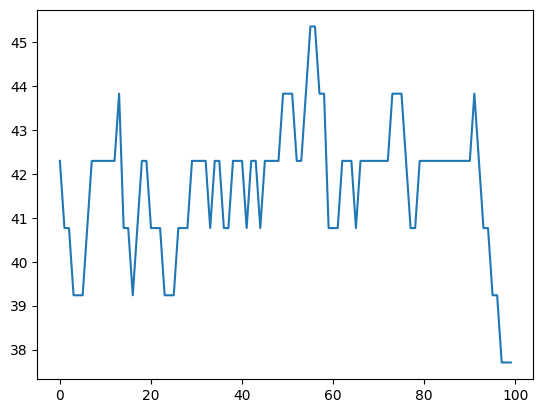

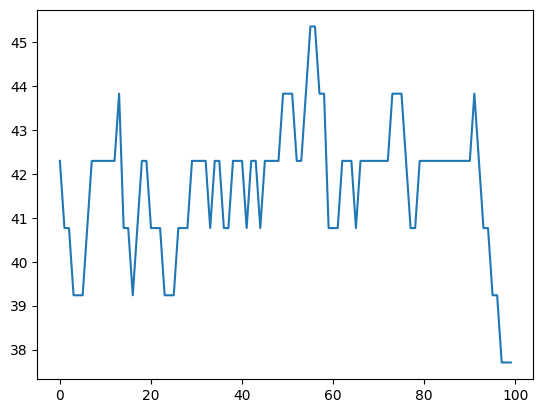

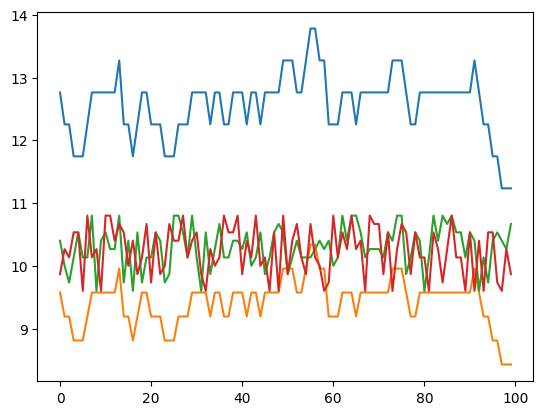

In [260]:
import matplotlib.pyplot as plt
plt.plot(u_history[-100:])
plt.show()


plt.plot(u_history[-100:])
plt.show()

plt.plot(qc_history[-100:])
plt.plot(qm_history[-100:])
plt.plot(q1_history[-100:])
plt.plot(q2_history[-100:])
plt.show()

In [261]:
def boltzmann_action_probs(Q, state, temperature):
    # compute the modified probabilities of each action using the Boltzmann distribution
    max_Q = np.max(Q[state])
    logits = (Q[state] - max_Q) / temperature
    exp_logits = np.exp(logits)
    probs = exp_logits / np.sum(exp_logits)
    return probs

for state1 in range(0,num_states1*num_states2):
    print(np.round(boltzmann_action_probs(Q1, state1, temperature),4))

[0.264  0.0408 0.0494 0.0637 0.0694 0.088  0.0402 0.0641 0.2348 0.0857]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1.00e-04 0.00e+00 6.00e-04 9.97e-01 4.00e-04 1.50e-03 0.00e+00 0.00e+00
 2.00e-04 0.00e+00]
[0.0562 0.087  0.0797 0.13   0.0745 0.0438 0.0687 0.1203 0.3165 0.0232]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0.0108 0.0057 0.0182 0.0063 0.02   0.0104 0.9085 0.0036 0.0125 0.0041]
[0.043  0.0301 0.4507 0.0193 0.0364 0.2296 0.0925 0.0465 0.0324 0.0194]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0

In [262]:
# impulse response
num_episodes = 20
state1 = 0
state2 = 0
q1_impulse=[]
q2_impulse=[]
for episode in range(num_episodes):
    u = shock_space[5]
    u_idx = 5
    if episode == 0:
        action1 = boltzmann_action_selection(Q1, state1,temperature)
        action2 = 2
    else:
        action1 = boltzmann_action_selection(Q1, state1,temperature)
        action2 = boltzmann_action_selection(Q2, state2,temperature)

    quantity1 = action2quantity[action1]
    quantity2 = action2quantity[action2]

   # take the selected action and observe the next state and reward
    next_state1 = 10*action2+u_idx
    next_state2 = 10*action1+u_idx

    # rewards
    reward1 = cournot(u,v,w,n).profit(quantity1,quantity2)
    reward2 = cournot(u,v,w,n).profit(quantity2,quantity1)

    # move to the next state
    state1 = next_state1
    state2 = next_state2

    # update temperature
    temperature = max(min_temperature, temperature * temperature_decay)
    eps = max(min_eps, eps * eps_decay)
    
    q1_impulse.append(quantity1)
    q2_impulse.append(quantity2)

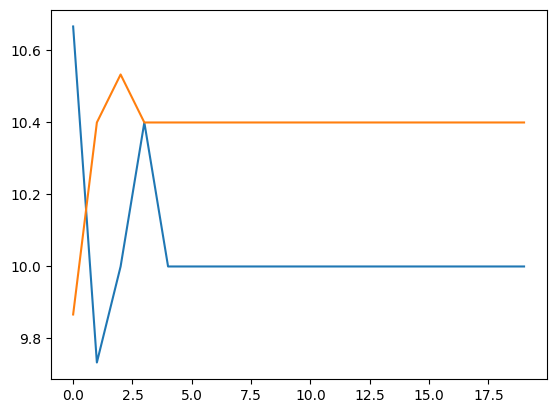

In [263]:
import matplotlib.pyplot as plt
plt.plot(q1_impulse)
plt.plot(q2_impulse)
plt.show()